<a href="https://colab.research.google.com/github/anvithakp/ML-Google-Colab/blob/master/Anvitha_014503593_Midterm_Numeric_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Project - Applying ML Lifecycle to understand, cluster, predict and classify House Prices**

##**Business Case and Value:**

Given is a San Diego real-estate listing dataset with information about the houses that were sold in the San-Diego County area and their respective attributes.

The goal is to find the following :

Given the training data , 

1.   the model should be able to determine if the house is investible or not. ( whether it is an investment property or not)

2.   Given the training data, the model should be able to predict the golden cluster of houses that the investor can invest in to achieve profits.

1.   Predict High value, low value and median value houses which the user will be interested in





##**Data** **Narrative**:

The original dataset contains house sale prices of San Diego County. It includes homes sold

247 observations and 19 variables
Descriptions and names of the columns (features) are given below:

Listing Picture : Url to picture of house in dataset

MLS# : id of the house

Status : unknown

Style : If its a condo, or townhouse or attached house

Full Address: Address of the house

Zip : zipcode of the house's location

Community : two letter abbrevation for the community in which the house is present

MapCoord : Geometrical coordinations of the house

beds: Numer of Bedrooms

TotB: Numer of bathrooms

EstSF: Square footage of the living room

yr_built: Built year

DOMLS : unknown

ListPrice : price of the house listed

List Date : date of the listed house

Sold Price : blank

COEDate : blank

Sale/Rent : if the house is for sale/rent

Vacation Rental by owner : if the owner uses to put up as vacation rental or not.


Standard imports

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns; sns.set() 
import numpy as np
import pandas as pd

Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing and reading the dataset into pandas dataframe

In [ ]:
import pandas as pd
sd_data = pd.read_csv('/content/drive/My Drive/Midterm/SanDiegoHousing-DatSet.csv')

Printing rows and columns for the housing dataset

In [ ]:
# read data into a dataframe and assign column headers
import warnings
warnings.filterwarnings('ignore')
print("Number of Rows and Columns::", sd_data.shape)
print("\n\nFirst row printed vertically::\n", sd_data.iloc[0])

Number of Rows and Columns:: (247, 19)


First row printed vertically::
 Listing Pictures            http://cdnparap00.paragonrels.com/ParagonImage...
MLS #                                                               180045508
Status                                                                    ACT
Style                                                                     ATT
Full Address                                            4095 Bonita Road  132
Zip                                                                     91902
Community                                                                BONT
MapCoord                                                                  NaN
Beds                                                                        2
TotB                                                                        2
EstSF                                                                   1,007
YrBlt                                                                

Dropping the unknown and blank columns in the dataset for better understanding

In [ ]:
sd_data = sd_data.drop(['Sold Price','COEDate','DOMLS','MLS #','Listing Pictures', 'MapCoord'],axis=1)

## Amalgamating extra 800 rows of San Diego houses-sold Data scraped from zillow for better model training

In [ ]:
extra_data = pd.read_csv('/content/drive/My Drive/Midterm/ExtraData.csv')

In [ ]:
# extra_data
import re
def apply_regex(data):
   p = re.search("CA (\d+)", str(data))
   if str(p) in 'None':
     return 0
   else:
     return p.group(1)
zipcodes=[]
for address in extra_data['address']:
  zipcodes.append(apply_regex(address))
# zipcodes
extra_data['ZIPCODE'] = zipcodes

In [ ]:
extra_data

,Unnamed: 0,prices,address,links,beds,baths,sq_feet,zestimate,Rent,HOA,Walk_Score,Mortgage,ZIPCODE
0,0,544000.0,12044 Caminito San Diego CA 92128,https://www.zillow.com/homedetails/12044-Camin...,3,2,1454,0,2324,0,68,0,92128
1,1,580000.0,620 State St UNIT 219 San Diego CA 92101,https://www.zillow.com/homedetails/620-State-S...,2,2,1038,"582,288",2800,498,94,2951,92101
2,2,640000.0,1844 Rowan St San Diego CA 92105,https://www.zillow.com/homedetails/1844-Rowan-...,3,1,1089,"665,926",2650,0,31,2707,92105
3,3,347500.0,1645 Emerald St APT 2B San Diego CA 92109,https://www.zillow.com/homedetails/1645-Emeral...,1,1,650,"349,143",1700,305,94,1790,92109
4,4,150.0,5447 Westknoll Dr La Jolla CA 92037,https://www.zillow.com/homedetails/5447-Westkn...,3,2,2063,"1,508,522",6489,0,13,6576,92037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,369000.0,8711 Wahl St Santee CA 92071,https://www.zillow.com/homedetails/135-Reynosa...,5,6,5399,0,0,0,66,0,92071
796,796,700000.0,3571 Ben St San Diego CA 92111,https://www.zillow.com/homedetails/16750-Coyot...,4,3,1728,"786,783",3325,0,48,0,92111
797,797,485000.0,1580 Union St UNIT 204 San Diego CA 92101,https://www.zillow.com/homedetails/4701-Date-A...,4,3,2484,"480,353",2650,570,88,2621,92101
798,798,665000.0,10535 Susie Pl Santee CA 92071,https://www.zillow.com/homedetails/1646-La-Pre...,4,5,3191,"635,264",2850,0,18,2537,92071


In [ ]:
extra_data = extra_data[(extra_data != 0).all(1)]
extra_data = extra_data.loc[:, ~extra_data.columns.str.contains('^Unnamed')]
extra_data.rename(columns = {'address':'Full Address'}, inplace = True) 
extra_data.rename(columns = {'sq_feet':'EstSF'}, inplace = True) 
extra_data.rename(columns = {'beds':'Beds'}, inplace = True) 
extra_data.rename(columns = {'baths':'TotB'}, inplace = True) 

In [ ]:
sd_data

,Status,Style,Full Address,Zip,Community,Beds,TotB,EstSF,YrBlt,ListPrice,Lst Date,Sale/Rent,Vacation Rental By Owner
0,ACT,ATT,4095 Bonita Road 132,91902,BONT,2,2,"1,007",1970,"$310,000",8/15/18,For Sale,NaN
1,ACT,TOWNH,88 Fourth Ave 10,91910,CV,3,2,"1,611",2004,"$399,900",5/6/18,For Sale,NaN
2,ACT,ATT,2167 Palo Alto Dr 133,91914,CV,2,2,"1,061",2006,"$374,000",6/29/18,For Sale,NaN
3,ACT,TOWNH,2134 Cantata Dr. 36,91914,CV,2,2,"1,061",2006,"$379,000",7/30/18,For Sale,NaN
4,ACT,ATT,280 Salinas Dr. 171,91914,CV,2,2,"1,061",2006,"$372,000 - $385,000",7/10/18,For Sale,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,ACT,TOWNH,7019 DEERHURST CT,92139,PH,3,2,"1,381",1980,"$425,000 - $435,000",8/9/18,For Sale,NaN
243,ACT,ATT,2233 Manzana Way,92139,PH,4,3,"1,701",1985,"$460,000",8/10/18,For Sale,NaN
244,ACT,TOWNH,24374 Larchmont Ct 69,92653,OOFA,2,3,"1,288",1985,"$499,000",7/20/18,For Sale,NaN
245,ACT,ATT,25185 Via Terracina,92677,OOFA,2,2,"1,113",1989,"$515,000",8/1/18,For Sale,NaN


## **Amalgamating** San Diego ' zipcode - community name ' to add a new column 'community' that describes the community in which the house is present in

Data Source : https://data.sandiegocounty.gov/Maps-and-Geographical-Resources/Zip-Codes/vsuf-uefy

In [ ]:
city_data = pd.read_excel('/content/drive/My Drive/Midterm/ZIP_CODES.xlsx')


In [ ]:
city_data.rename(columns = {'ZIP':'ZIPCODE'}, inplace = True) 

In [ ]:
city_zip = city_data[['ZIPCODE','COMMUNITY']]

dict={}
for index, row in city_data.iterrows():
  dict[row['ZIPCODE']] = row['COMMUNITY']


In [ ]:
SD_df = pd.DataFrame(sd_data)

In [ ]:
extra_df = pd.DataFrame(extra_data)


In [ ]:
extra_df['ZIPCODE'] = extra_df['ZIPCODE'].astype(int)

In [ ]:
SD_df.rename(columns = {'Zip':'ZIPCODE'}, inplace = True) 

In [ ]:
for i in SD_df.index:
  zipcode=SD_df.at[i,"ZIPCODE"]
  if zipcode in dict.keys():
      value=dict[zipcode]
  else:
      value = "Orange County"
  SD_df.at[i,"COMMUNITY"]= str(value)
SD_df

,Status,Style,Full Address,ZIPCODE,Community,Beds,TotB,EstSF,YrBlt,ListPrice,Lst Date,Sale/Rent,Vacation Rental By Owner,COMMUNITY
0,ACT,ATT,4095 Bonita Road 132,91902,BONT,2,2,"1,007",1970,"$310,000",8/15/18,For Sale,NaN,Bonita
1,ACT,TOWNH,88 Fourth Ave 10,91910,CV,3,2,"1,611",2004,"$399,900",5/6/18,For Sale,NaN,Chula Vista
2,ACT,ATT,2167 Palo Alto Dr 133,91914,CV,2,2,"1,061",2006,"$374,000",6/29/18,For Sale,NaN,Chula Vista
3,ACT,TOWNH,2134 Cantata Dr. 36,91914,CV,2,2,"1,061",2006,"$379,000",7/30/18,For Sale,NaN,Chula Vista
4,ACT,ATT,280 Salinas Dr. 171,91914,CV,2,2,"1,061",2006,"$372,000 - $385,000",7/10/18,For Sale,NaN,Chula Vista
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,ACT,TOWNH,7019 DEERHURST CT,92139,PH,3,2,"1,381",1980,"$425,000 - $435,000",8/9/18,For Sale,NaN,San Diego
243,ACT,ATT,2233 Manzana Way,92139,PH,4,3,"1,701",1985,"$460,000",8/10/18,For Sale,NaN,San Diego
244,ACT,TOWNH,24374 Larchmont Ct 69,92653,OOFA,2,3,"1,288",1985,"$499,000",7/20/18,For Sale,NaN,Orange County
245,ACT,ATT,25185 Via Terracina,92677,OOFA,2,2,"1,113",1989,"$515,000",8/1/18,For Sale,NaN,Orange County


In [ ]:
SD_df = SD_df.drop(['Community'],axis=1)


In [ ]:
for i in extra_df.index:
  zipcode=extra_df.at[i,"ZIPCODE"]
  if zipcode in dict.keys():
      value=dict[zipcode]
  else:
      value = 0
  extra_df.at[i,"COMMUNITY"]= str(value)
extra_df

,prices,Full Address,links,Beds,TotB,EstSF,zestimate,Rent,HOA,Walk_Score,Mortgage,ZIPCODE,COMMUNITY
1,580000.0,620 State St UNIT 219 San Diego CA 92101,https://www.zillow.com/homedetails/620-State-S...,2,2,1038,"582,288",2800,498,94,2951,92101,San Diego
3,347500.0,1645 Emerald St APT 2B San Diego CA 92109,https://www.zillow.com/homedetails/1645-Emeral...,1,1,650,"349,143",1700,305,94,1790,92109,Mission Beach
5,336000.0,615 Fredricks Ave UNIT 140 Oceanside CA 92058,https://www.zillow.com/homedetails/615-Fredric...,3,2,1129,"337,860",2200,339,32,1775,92058,Camp Pendleton
7,128.0,6317 Heritage Dr Carlsbad CA 92009,https://www.zillow.com/homedetails/6317-Herita...,3,3,2812,"1,250,729",4300,265,53,5877,92009,Carlsbad
8,474900.0,3655 Vista Campana N UNIT 8 Oceanside CA 92057,https://www.zillow.com/homedetails/3655-Vista-...,3,2,1996,"470,803",2450,414,42,2443,92057,Oceanside
...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,455000.0,7700 Parkway Dr UNIT 18 La Mesa CA 91942,https://www.zillow.com/homedetails/2133-Steige...,3,3,1501,"818,602",3200,17,9,3476,91942,La Mesa
792,129.0,5815 Caminito Empresa La Jolla CA 92037,https://www.zillow.com/homedetails/3862-La-Jol...,4,4,4084,"689,007",3195,390,66,3302,92037,La Jolla
793,520000.0,2437 M Ave National City CA 91950,https://www.zillow.com/homedetails/12896-Camin...,3,4,2883,"1,055,009",3921,218,11,4821,91950,National City
794,475500.0,4011 Lamont St UNIT 2B San Diego CA 92109,https://www.zillow.com/homedetails/4011-Lamont...,4,4,2072,"379,279",1995,325,67,1944,92109,Mission Beach


In [ ]:
extra_df = extra_df[(extra_df != '0').all(1)]

# Data Enrichment - 1 

First, the zillow data for the respective house is scraped for the following values that could be of use to our model prediction
HOA ( House owner association fee) (in dollars)
Mortgage (in dollars)
Rent Estimate ( in dollars)
Walking_Score - that determine hundreds of walking routes to nearby amenities. Points are awarded based on the distance to amenities in each category. ( Higher the points .. higher it is desired by investors)


In [ ]:
zillow_data = pd.read_csv('/content/drive/My Drive/Midterm/Amalgamation1.csv')

In [ ]:
zillow_data.head()

,Unnamed: 0,links,Full Address,zestimate,Rent,HOA,Mortgage,Sold_Price,Walk_Score
0,0,https://www.zillow.com/homes/4095-Bonita-Road-...,4095 Bonita Road 132,"326,734",1950,470,1715,"290,000",50
1,1,https://www.zillow.com/homedetails/88-4th-Ave-...,88 Fourth Ave 10,"445,826",2550,320,2058,"405,000",79
2,2,https://www.zillow.com/homedetails/2167-Palo-A...,2167 Palo Alto Dr 133,"427,769",2200,127,1844,"400,000",11
3,3,https://www.zillow.com/homedetails/2134-Cantat...,2134 Cantata Dr. 36,"412,284",2200,358,1937,"368,000",11
4,4,https://www.zillow.com/homes/280-Salinas-Dr.--...,280 Salinas Dr. 171,"412,989",2240,125,1730,"374,000",7


In [ ]:
zillow_data = zillow_data.loc[:, ~zillow_data.columns.str.contains('^Unnamed')]


In [ ]:
zillow_data.head()

,links,Full Address,zestimate,Rent,HOA,Mortgage,Sold_Price,Walk_Score
0,https://www.zillow.com/homes/4095-Bonita-Road-...,4095 Bonita Road 132,"326,734",1950,470,1715,"290,000",50
1,https://www.zillow.com/homedetails/88-4th-Ave-...,88 Fourth Ave 10,"445,826",2550,320,2058,"405,000",79
2,https://www.zillow.com/homedetails/2167-Palo-A...,2167 Palo Alto Dr 133,"427,769",2200,127,1844,"400,000",11
3,https://www.zillow.com/homedetails/2134-Cantat...,2134 Cantata Dr. 36,"412,284",2200,358,1937,"368,000",11
4,https://www.zillow.com/homes/280-Salinas-Dr.--...,280 Salinas Dr. 171,"412,989",2240,125,1730,"374,000",7


In [ ]:
cols = ['zestimate','Rent','Mortgage','Sold_Price','Walk_Score','Full Address','HOA']
zillow_df = zillow_data[cols]
SD_df = pd.merge(SD_df, zillow_df, how='inner', on='Full Address')
SD_df

,Status,Style,Full Address,ZIPCODE,Beds,TotB,EstSF,YrBlt,ListPrice,Lst Date,Sale/Rent,Vacation Rental By Owner,COMMUNITY,zestimate,Rent,Mortgage,Sold_Price,Walk_Score,HOA
0,ACT,ATT,4095 Bonita Road 132,91902,2,2,"1,007",1970,"$310,000",8/15/18,For Sale,NaN,Bonita,"326,734",1950,1715,"290,000",50,470
1,ACT,TOWNH,88 Fourth Ave 10,91910,3,2,"1,611",2004,"$399,900",5/6/18,For Sale,NaN,Chula Vista,"445,826",2550,2058,"405,000",79,320
2,ACT,ATT,2167 Palo Alto Dr 133,91914,2,2,"1,061",2006,"$374,000",6/29/18,For Sale,NaN,Chula Vista,"427,769",2200,1844,"400,000",11,127
3,ACT,TOWNH,2134 Cantata Dr. 36,91914,2,2,"1,061",2006,"$379,000",7/30/18,For Sale,NaN,Chula Vista,"412,284",2200,1937,"368,000",11,358
4,ACT,ATT,280 Salinas Dr. 171,91914,2,2,"1,061",2006,"$372,000 - $385,000",7/10/18,For Sale,NaN,Chula Vista,"412,989",2240,1730,"374,000",7,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,ACT,TOWNH,7019 DEERHURST CT,92139,3,2,"1,381",1980,"$425,000 - $435,000",8/9/18,For Sale,NaN,San Diego,"457,778",2500,1872,"405,000",42,134
243,ACT,ATT,2233 Manzana Way,92139,4,3,"1,701",1985,"$460,000",8/10/18,For Sale,NaN,San Diego,"507,709",2750,2224,"463,500",22,235
244,ACT,TOWNH,24374 Larchmont Ct 69,92653,2,3,"1,288",1985,"$499,000",7/20/18,For Sale,NaN,Orange County,"477,661",2600,2342,"479,093",48,320
245,ACT,ATT,25185 Via Terracina,92677,2,2,"1,113",1989,"$515,000",8/1/18,For Sale,NaN,Orange County,"541,528",2550,2427,"500,000",57,310


In [ ]:
# print inital shapes for csv i.e tha germandataframe = germandf
print("Initial Shape of San-Diego Housing Data:",SD_df.shape,'\n')

Initial Shape of San-Diego Housing Data: (247, 19) 



The above displays the total number of rows and columns in the dataset

**Data Cleaning:**

Checking if any null values are present in the dataset 

In [ ]:
SD_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Status                    247 non-null    object
 1   Style                     247 non-null    object
 2   Full Address              247 non-null    object
 3   ZIPCODE                   247 non-null    int64 
 4   Beds                      247 non-null    int64 
 5   TotB                      247 non-null    int64 
 6   EstSF                     247 non-null    object
 7   YrBlt                     247 non-null    int64 
 8   ListPrice                 247 non-null    object
 9   Lst Date                  247 non-null    object
 10  Sale/Rent                 247 non-null    object
 11  Vacation Rental By Owner  16 non-null     object
 12  COMMUNITY                 247 non-null    object
 13  zestimate                 247 non-null    object
 14  Rent                      

In [ ]:
SD_df['Sold_Price'] = SD_df['Sold_Price'].str.replace(',', '').astype(int)
SD_df['EstSF'] = SD_df['EstSF'].str.replace(',', '').astype(int)
SD_df['zestimate'] = SD_df['zestimate'].str.replace(',', '').astype(int)

In [ ]:

SD_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Status                    247 non-null    object
 1   Style                     247 non-null    object
 2   Full Address              247 non-null    object
 3   ZIPCODE                   247 non-null    int64 
 4   Beds                      247 non-null    int64 
 5   TotB                      247 non-null    int64 
 6   EstSF                     247 non-null    int64 
 7   YrBlt                     247 non-null    int64 
 8   ListPrice                 247 non-null    object
 9   Lst Date                  247 non-null    object
 10  Sale/Rent                 247 non-null    object
 11  Vacation Rental By Owner  16 non-null     object
 12  COMMUNITY                 247 non-null    object
 13  zestimate                 247 non-null    int64 
 14  Rent                      

In [ ]:
SD_df = SD_df.drop(['Status','Style','Lst Date','ListPrice','Sale/Rent','Vacation Rental By Owner'], axis=1)

In [ ]:
SD_df.describe()

,ZIPCODE,Beds,TotB,EstSF,YrBlt,zestimate,Rent,Mortgage,Sold_Price,Walk_Score,HOA
count,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000,247.000000,2.470000e+02,247.000000,247.000000
mean,92072.348178,2.453441,2.271255,1238.894737,1984.724696,4.767058e+05,2434.680162,2124.190283,4.324019e+05,50.016194,323.004049
std,84.624951,0.574579,0.445510,184.321424,12.472943,1.534089e+05,607.904015,719.246235,1.380469e+05,24.898814,152.757939
min,91902.000000,2.000000,2.000000,1000.000000,1963.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,92009.000000,2.000000,2.000000,1090.500000,1975.000000,4.123570e+05,2297.500000,1889.000000,3.730000e+05,33.000000,263.000000
50%,92104.000000,2.000000,2.000000,1195.000000,1982.000000,4.895140e+05,2500.000000,2183.000000,4.400000e+05,50.000000,340.000000
75%,92117.000000,3.000000,3.000000,1370.000000,1990.000000,5.441685e+05,2650.000000,2480.500000,4.957070e+05,68.000000,400.500000
max,92677.000000,4.000000,3.000000,1872.000000,2018.000000,2.103099e+06,8028.000000,8814.000000,1.875000e+06,99.000000,834.000000


In [ ]:
SD_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Full Address  247 non-null    object
 1   ZIPCODE       247 non-null    int64 
 2   Beds          247 non-null    int64 
 3   TotB          247 non-null    int64 
 4   EstSF         247 non-null    int64 
 5   YrBlt         247 non-null    int64 
 6   COMMUNITY     247 non-null    object
 7   zestimate     247 non-null    int64 
 8   Rent          247 non-null    int64 
 9   Mortgage      247 non-null    int64 
 10  Sold_Price    247 non-null    int64 
 11  Walk_Score    247 non-null    int64 
 12  HOA           247 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 27.0+ KB


In [ ]:
SD_df = SD_df.drop(['YrBlt'],axis=1)
extra_df = extra_df.drop(['links'],axis=1)

In [ ]:
extra_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 1 to 797
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   prices        418 non-null    float64
 1   Full Address  418 non-null    object 
 2   Beds          418 non-null    object 
 3   TotB          418 non-null    object 
 4   EstSF         418 non-null    object 
 5   zestimate     418 non-null    object 
 6   Rent          418 non-null    int64  
 7   HOA           418 non-null    int64  
 8   Walk_Score    418 non-null    int64  
 9   Mortgage      418 non-null    int64  
 10  ZIPCODE       418 non-null    int64  
 11  COMMUNITY     418 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 42.5+ KB


In [ ]:
extra_df = extra_df.rename(columns={"prices": "Sold_Price"})



In [ ]:
extra_df['Sold_Price'] = extra_df['Sold_Price'].astype(int)
extra_df['Beds'] = extra_df['Beds'].astype(int)
extra_df['TotB'] = extra_df['TotB'].astype(int)
extra_df['EstSF'] = extra_df['EstSF'].astype(int)



In [ ]:
extra_df['zestimate'] = extra_df['zestimate'].str.replace(',', '').astype(int)


In [ ]:
extra_df['ZIPCODE'] = extra_df['ZIPCODE'].astype(int)

In [ ]:
extra_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 1 to 797
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sold_Price    418 non-null    int64 
 1   Full Address  418 non-null    object
 2   Beds          418 non-null    int64 
 3   TotB          418 non-null    int64 
 4   EstSF         418 non-null    int64 
 5   zestimate     418 non-null    int64 
 6   Rent          418 non-null    int64 
 7   HOA           418 non-null    int64 
 8   Walk_Score    418 non-null    int64 
 9   Mortgage      418 non-null    int64 
 10  ZIPCODE       418 non-null    int64 
 11  COMMUNITY     418 non-null    object
dtypes: int64(10), object(2)
memory usage: 42.5+ KB


In [ ]:
SD_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Full Address  247 non-null    object
 1   ZIPCODE       247 non-null    int64 
 2   Beds          247 non-null    int64 
 3   TotB          247 non-null    int64 
 4   EstSF         247 non-null    int64 
 5   COMMUNITY     247 non-null    object
 6   zestimate     247 non-null    int64 
 7   Rent          247 non-null    int64 
 8   Mortgage      247 non-null    int64 
 9   Sold_Price    247 non-null    int64 
 10  Walk_Score    247 non-null    int64 
 11  HOA           247 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 25.1+ KB


In [ ]:
SD_df = pd.concat([extra_df, SD_df], ignore_index=True)

In [ ]:
SD_df.head()

,Sold_Price,Full Address,Beds,TotB,EstSF,zestimate,Rent,HOA,Walk_Score,Mortgage,ZIPCODE,COMMUNITY
0,580000,620 State St UNIT 219 San Diego CA 92101,2,2,1038,582288,2800,498,94,2951,92101,San Diego
1,347500,1645 Emerald St APT 2B San Diego CA 92109,1,1,650,349143,1700,305,94,1790,92109,Mission Beach
2,336000,615 Fredricks Ave UNIT 140 Oceanside CA 92058,3,2,1129,337860,2200,339,32,1775,92058,Camp Pendleton
3,128,6317 Heritage Dr Carlsbad CA 92009,3,3,2812,1250729,4300,265,53,5877,92009,Carlsbad
4,474900,3655 Vista Campana N UNIT 8 Oceanside CA 92057,3,2,1996,470803,2450,414,42,2443,92057,Oceanside


##**Data Visualization**

###**Pair plotting**



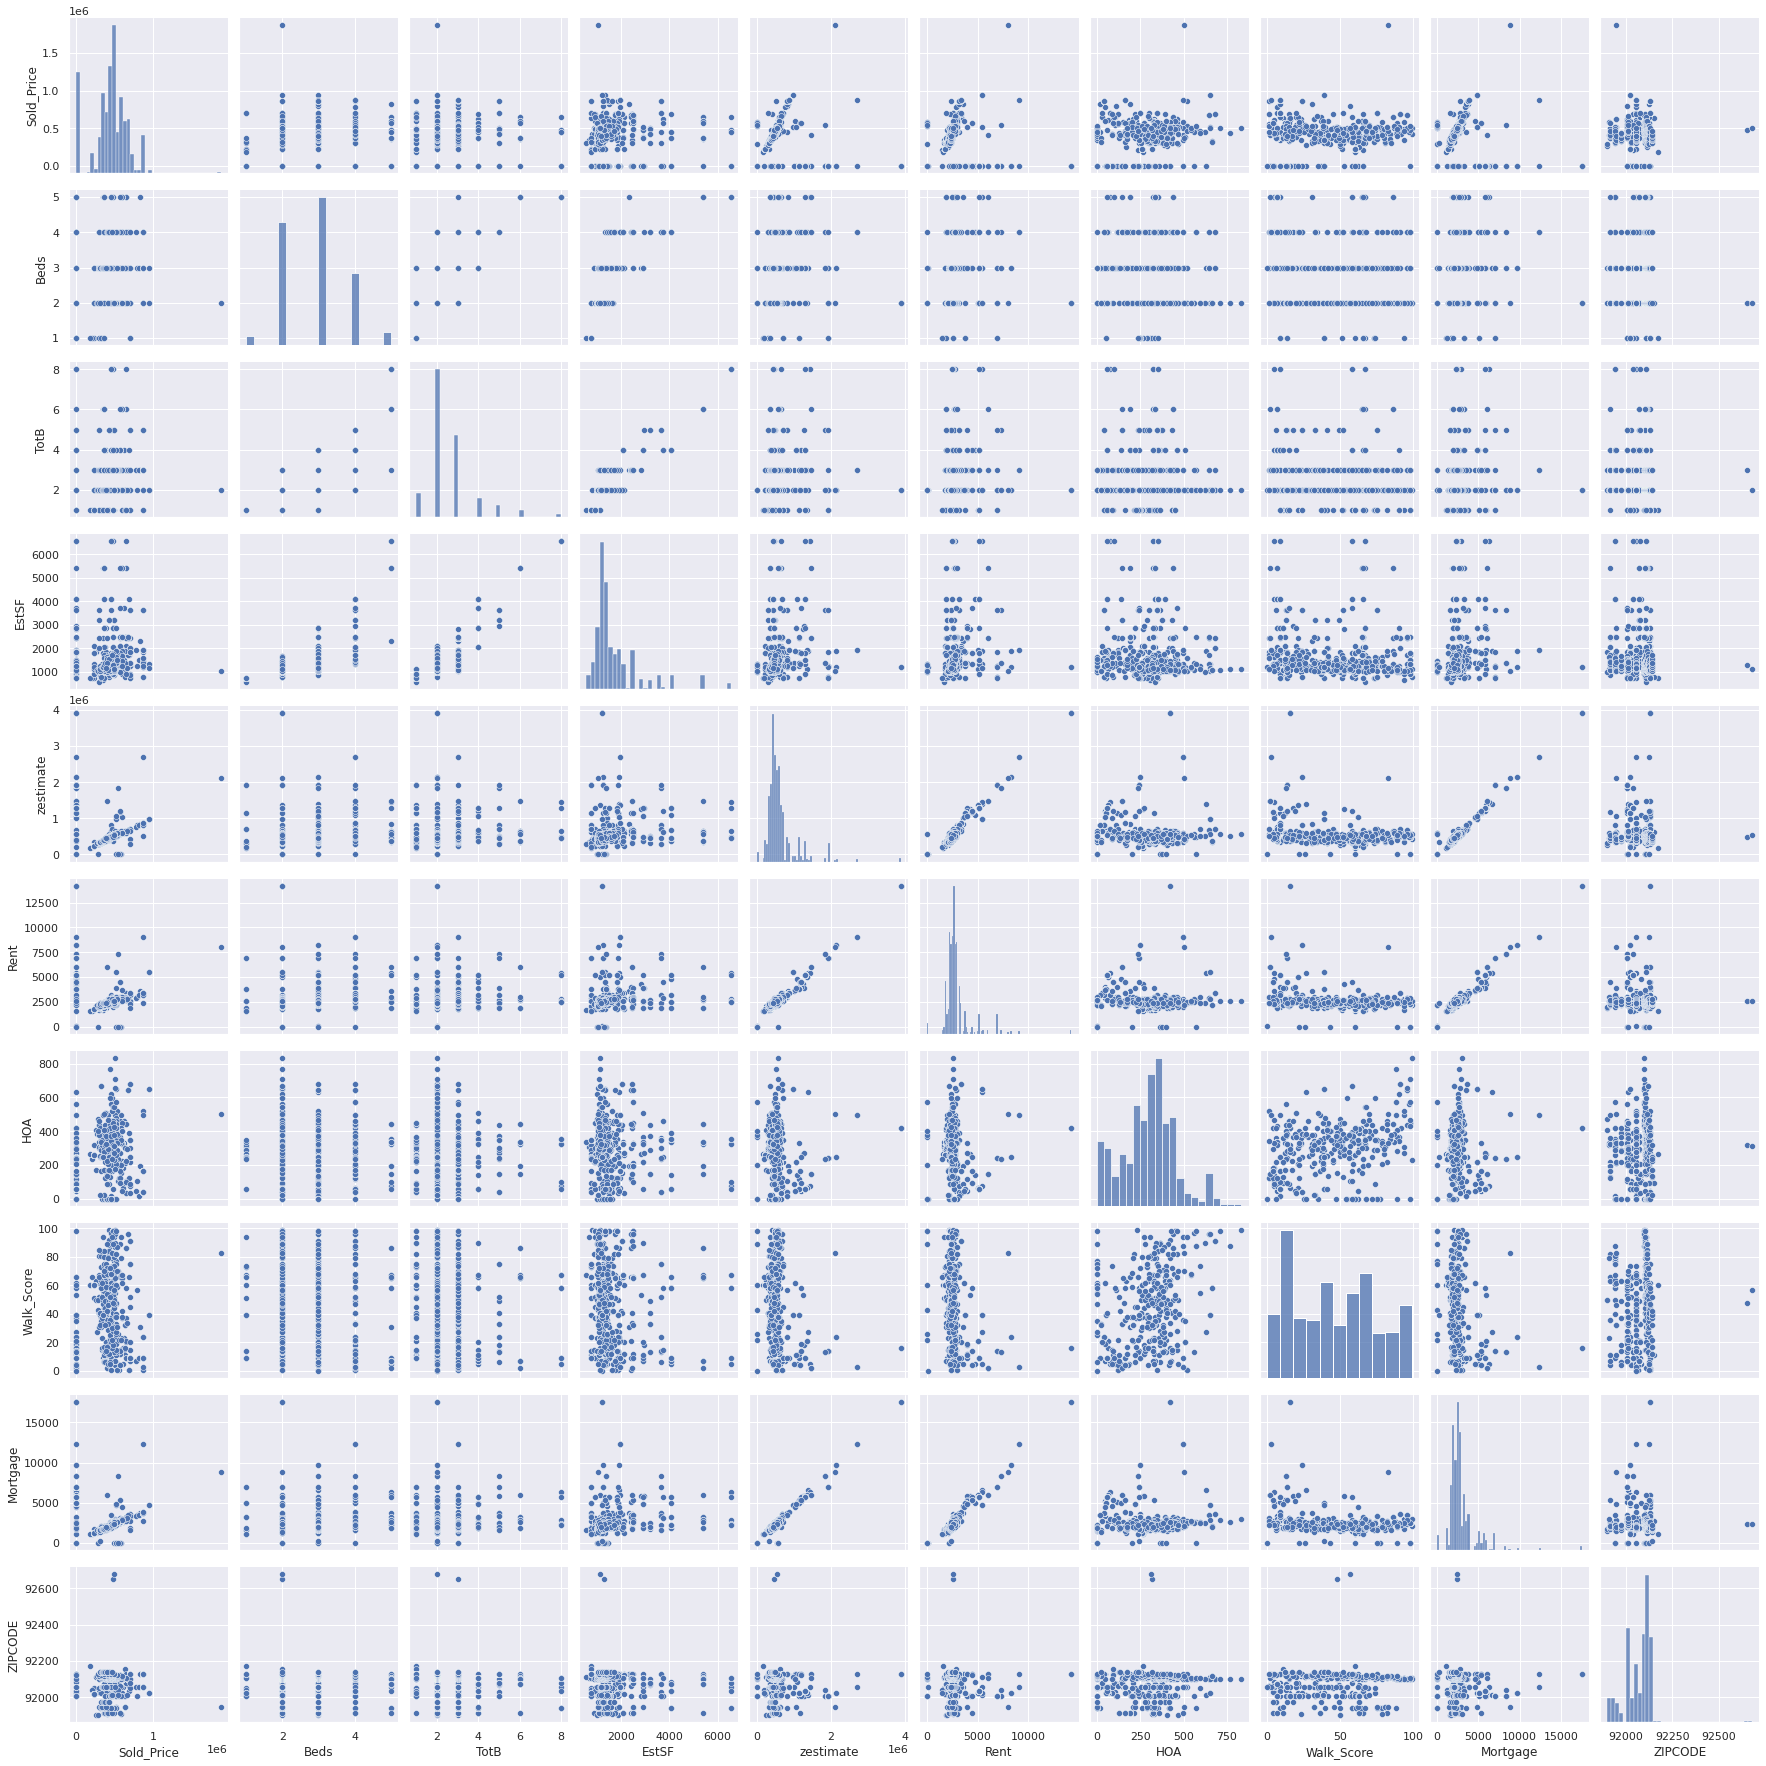

In [ ]:
sns.set()
sns.pairplot(SD_df, height = 2.5)
plt.show();

From the above Pair plot we noticed that sold price and walk score and zipcode are linearly well related.

# Data Enrichment - 2

We are deriving the best places to live in by selecting the communities with highest average selling place per year and amalgamating with our dataset, to get the best investible houses in the best communities that yield a better profit in the future 

In [ ]:
Avg_SP_data1 = pd.read_csv('/content/drive/My Drive/Midterm/Additional1/Average Sales Price-Logan Heights Imperial Beach Mission Hills Mission Valley-20180905.csv')
Avg_SP_data2 = pd.read_csv('/content/drive/My Drive/Midterm/Additional1/Average Sales Price-Mira Mesa San Carlos Santee La Mesa-20180905.csv')
Avg_SP_data3 = pd.read_csv('/content/drive/My Drive/Midterm/Additional1/Average Sales Price-North Park Hillcrest University Heights Old Town-20180905.csv')
Avg_SP_data4 = pd.read_csv('/content/drive/My Drive/Midterm/Additional1/Average Sales Price-Oceanside Carlsbad South Encinitas Solana Beach-20180905.csv')
Avg_SP_data5 = pd.read_csv('/content/drive/My Drive/Midterm/Additional1/Average Sales Price-Oceanside Downtown Clairemont Bay Park-20180905.csv')
Avg_SP_data6 = pd.read_csv('/content/drive/My Drive/Midterm/Additional1/Average Sales Price-Oceanside La Jolla Pacific Beach Mission Beach-20180905.csv')
Avg_SP_data7 = pd.read_csv('/content/drive/My Drive/Midterm/Additional1/Average Sales Price-Rancho Bernardo Rancho Penasquitos Poway Scripps Ranch-20180905.csv')
Avg_SP_data8 = pd.read_csv('/content/drive/My Drive/Midterm/Additional1/Average Sales Price-San Marcos Vista Lake San Marcos Fallbrook-20180905.csv')


In [ ]:
Avg_SP_data1.head()

,Date,Logan Heights,Imperial Beach,Mission Hills,Mission Valley
0,4-Jan,249634,392660,581678,290625
1,4-Feb,254732,396370,587827,293315
2,4-Mar,257309,404544,596196,301396
3,4-Apr,269281,422106,646806,309597
4,4-May,274899,439246,653416,321087


In [ ]:
Avg_SP_data1.describe()

,Logan Heights,Imperial Beach,Mission Hills,Mission Valley
count,176.000000,176.000000,1.760000e+02,176.000000
mean,254876.500000,386300.551136,7.898533e+05,345276.056818
std,83498.371835,101414.222271,1.148164e+05,60772.931294
min,118179.000000,228994.000000,5.816780e+05,236426.000000
25%,175290.000000,285141.500000,6.934285e+05,290628.000000
50%,267506.000000,393775.500000,7.979995e+05,354784.000000
75%,331553.750000,468404.000000,8.677875e+05,399439.250000
max,387534.000000,563422.000000,1.046276e+06,445427.000000


In [ ]:
Avg_SP_data2.describe()

,Mira Mesa,San Carlos,Santee,La Mesa
count,176.000000,176.000000,176.000000,176.000000
mean,390848.011364,419527.210227,337109.085227,398779.732955
std,65195.937222,66254.759027,58161.666008,65069.708160
min,291139.000000,310440.000000,252160.000000,292825.000000
25%,321056.250000,353589.000000,274543.000000,326926.250000
50%,399167.000000,429569.500000,342034.000000,407359.500000
75%,444387.000000,473685.250000,387465.250000,455115.000000
max,536109.000000,549501.000000,461200.000000,514046.000000


In [ ]:
Avg_SP_data3.describe()

,North Park,Hillcrest,University Heights,Old Town
count,176.000000,176.000000,176.000000,176.000000
mean,424708.420455,468511.017045,434978.977273,391148.812500
std,75392.535691,67295.001468,81694.692718,81559.829875
min,319920.000000,341131.000000,309085.000000,221278.000000
25%,345593.000000,416225.000000,356501.250000,328900.000000
50%,428646.000000,473503.000000,441679.500000,400277.000000
75%,478502.250000,516181.250000,496665.000000,465104.750000
max,612138.000000,606803.000000,606708.000000,545846.000000


In [ ]:
Avg_SP_data4.describe()

,Oceanside,Carlsbad South,Encinitas,Solana Beach
count,176.000000,176.000000,1.760000e+02,1.760000e+02
mean,390091.164773,706632.136364,7.932985e+05,1.030425e+06
std,74438.851250,91308.861111,1.254383e+05,1.601423e+05
min,275969.000000,520410.000000,6.163920e+05,6.881780e+05
25%,302025.250000,630901.500000,6.719302e+05,9.206008e+05
50%,403978.000000,697252.000000,7.987505e+05,1.015062e+06
75%,460139.500000,750872.000000,8.730252e+05,1.134978e+06
max,511689.000000,907550.000000,1.057502e+06,1.410942e+06


In [ ]:
Avg_SP_data5.describe()

,Oceanside,Downtown,Clairemont,Bay Park
count,176.000000,1.580000e+02,176.000000,176.000000
mean,390091.164773,5.572812e+05,450449.710227,588130.357955
std,74438.851250,9.881921e+04,68366.836571,84312.683156
min,275969.000000,3.941830e+05,356652.000000,448743.000000
25%,302025.250000,4.845318e+05,374798.500000,512266.250000
50%,403978.000000,5.710245e+05,463881.000000,598009.500000
75%,460139.500000,6.295672e+05,507543.250000,642636.500000
max,511689.000000,1.150000e+06,610978.000000,800290.000000


In [ ]:
Avg_SP_data6.describe()

,Oceanside,La Jolla,Pacific Beach,Mission Beach
count,176.000000,1.760000e+02,176.000000,1.760000e+02
mean,390091.164773,1.326751e+06,655265.835227,1.200778e+06
std,74438.851250,1.552400e+05,98829.767982,1.771954e+05
min,275969.000000,1.023623e+06,511628.000000,7.641970e+05
25%,302025.250000,1.181034e+06,580348.250000,1.079118e+06
50%,403978.000000,1.332358e+06,647960.000000,1.226684e+06
75%,460139.500000,1.457232e+06,717500.250000,1.342080e+06
max,511689.000000,1.635050e+06,891012.000000,1.551703e+06


In [ ]:
Avg_SP_data7.describe()

,Rancho Bernardo,Rancho Penasquitos,Poway,Scripps Ranch
count,176.000000,176.000000,176.000000,176.000000
mean,523271.840909,528145.880682,688265.590909,633240.590909
std,72427.655934,74531.390229,88410.809779,73394.310955
min,408889.000000,407144.000000,538306.000000,502004.000000
25%,451354.750000,447621.250000,602464.000000,567696.500000
50%,534651.000000,549008.000000,699257.000000,639024.000000
75%,572674.750000,578345.000000,759598.000000,678815.750000
max,696383.000000,692216.000000,842723.000000,837238.000000


In [ ]:
Avg_SP_data8.describe()

,San Marcos,Vista,Lake San Marcos,Fallbrook
count,176.000000,176.000000,176.000000,176.000000
mean,430085.409091,392911.443182,443466.823864,495237.147727
std,76254.644217,79000.952133,59030.891550,97912.135261
min,316105.000000,279294.000000,344412.000000,349250.000000
25%,344755.750000,299955.000000,389341.250000,382531.500000
50%,450174.000000,397942.000000,437621.000000,506885.000000
75%,494945.750000,464631.750000,490840.000000,580825.250000
max,578009.000000,515718.000000,554908.000000,662135.000000


From the above, Listing the communities and their annual average selling price for the year 2019 in the order of high to low Selling price.


1.  La Jolla      :1,326,751
3.  Mission Beach :1,200,778
2.  Solana Beach  :1,030,425
3.  Encinitas     :  793,298
1.  Mission Hills :  789,853
4.  Carlsbad      :  706,632
7.  Poway         :  688,265
6.  Pacific Beach :  655,265
7.  Scripps Ranch :  633,240
5.  Bay Park      :  588,130
5.  Downtown      :  557,281
11. Rancho        :  528,145

    Penasquitos

12. Rancho        :  523,271
    
    Bernardo

11. FallBrook     :  495,237    
2.  Hillcrest     :  468,511
9.  Clairemont    :  450,449
11. Lake SanMarcos:  443,466 
3.  University    :  434,978

    Heights

11. San Marcos    :  430,085 
4.  North Park    :  424,708
2.  San Carlos    :  419,527
3.  La Mesa       :  398,779
11. Vista         :  392,911
6.  Old Town      :  391,148
3.  Mira Mesa     :  390,848
11. Oceanside     :  390,091
2.  Imperial Beach:  386,300

3.  Mission valley:  345,276
3.  Santee        :  337,109
4.  Logan Heights :  254,776

###**How does this data enrichment benefit business usecase**

Amalgamating the best communities data into our housing dataset resulting in a dataset containing housing data in most desirable neighbourhoods.


In [ ]:
filter_list=['Mission Hills','La Jolla','Mission Beach','Solana Beach','Encinitas','Carlsbad','Poway','Scripps Ranch','Bay Park']
new_sd_df = SD_df[SD_df['COMMUNITY'].isin(filter_list)]
new_sd_df

,Sold_Price,Full Address,Beds,TotB,EstSF,zestimate,Rent,HOA,Walk_Score,Mortgage,ZIPCODE,COMMUNITY
1,347500,1645 Emerald St APT 2B San Diego CA 92109,1,1,650,349143,1700,305,94,1790,92109,Mission Beach
3,128,6317 Heritage Dr Carlsbad CA 92009,3,3,2812,1250729,4300,265,53,5877,92009,Carlsbad
8,127,4814 Nelson Ct Carlsbad CA 92010,4,5,2948,1288625,3944,270,18,5820,92010,Carlsbad
15,305000,3050 Rue Dorleans UNIT 213 San Diego CA 92110,1,1,547,299668,1650,336,67,1639,92110,Bay Park
20,795200,3825 Nautical Dr Carlsbad CA 92008,3,2,1243,815248,2975,108,57,3471,92008,Carlsbad
...,...,...,...,...,...,...,...,...,...,...,...,...
605,495000,3707 Balboa Terrace A,2,2,1241,558442,2500,450,51,2574,92117,Bay Park
606,516500,4166 Balboa Way,3,3,1872,582379,3000,440,82,2657,92117,Bay Park
644,411000,9917 Scripps Westview Way 120,2,2,1052,462240,2250,295,46,2059,92131,Scripps Ranch
645,450000,10563 Caminito Memosac,3,3,1540,508121,2700,0,58,1931,92131,Scripps Ranch


# Data Enrichment - 3

Adding the crime rate per community to the dataset

Data Source : https://data.sandiegocounty.gov/Safety/SANDAG-Crime-Data/486f-q228/data


In [ ]:
crime_data_SD = pd.read_csv('/content/drive/My Drive/Midterm/SANDAG_Crime_Data.csv')


In [ ]:
crime_data_SD

,Year,Jurisdiction,Crime rate,Violent crime rate,Property crime rate
0,2009,4S Ranch,9.58,1.03,8.55
1,2009,Alpine,13.89,2.62,11.28
2,2009,California,32.04,4.73,27.31
3,2009,Carlsbad,21.17,2.77,18.41
4,2009,Chula Vista,25.11,3.12,21.99
...,...,...,...,...,...
330,2019,Spring Valley,16.38,4.74,11.64
331,2019,Unincorporated,12.37,3.20,9.18
332,2019,United States,24.77,3.67,21.10
333,2019,Valley Center,12.13,3.03,9.10


In [ ]:
crime_data_all = crime_data_SD.groupby(crime_data_SD.Year)
crime_data_2019 = crime_data_all.get_group(2019)
crime_data_2019

,Year,Jurisdiction,Crime rate,Violent crime rate,Property crime rate
300,2019,Scripps Ranch,8.42,0.26,8.17
301,2019,Alpine,8.84,1.47,7.38
302,2019,Bonita,51.47,17.77,33.70
303,2019,California,27.72,4.41,23.31
304,2019,Camp Pendleton,24.99,4.00,20.99
305,2019,Carlsbad,20.61,2.08,18.53
306,2019,Chula Vista,17.39,3.33,14.06
307,2019,Coronado,13.76,0.37,13.39
308,2019,Del Mar,16.63,1.57,15.05
309,2019,El Cajon,24.61,5.23,19.38


In [ ]:
crime_data_2019 = crime_data_2019.rename(columns={"Jurisdiction": "COMMUNITY"})
dict={}
new_sd_df['crimerate'] = '0' 

for index, row in crime_data_2019.iterrows():
    dict[row['COMMUNITY']] = row['Crime rate']
# dict
for i in new_sd_df.index:
  community=new_sd_df.at[i,"COMMUNITY"]
  if community in dict.keys():
      value=dict[community]
  else:
      value = "0"
  new_sd_df.at[i,"crimerate"]= str(value)
new_sd_df
# crime_data_2019

,Sold_Price,Full Address,Beds,TotB,EstSF,zestimate,Rent,HOA,Walk_Score,Mortgage,ZIPCODE,COMMUNITY,crimerate
1,347500,1645 Emerald St APT 2B San Diego CA 92109,1,1,650,349143,1700,305,94,1790,92109,Mission Beach,62.2
3,128,6317 Heritage Dr Carlsbad CA 92009,3,3,2812,1250729,4300,265,53,5877,92009,Carlsbad,20.61
8,127,4814 Nelson Ct Carlsbad CA 92010,4,5,2948,1288625,3944,270,18,5820,92010,Carlsbad,20.61
15,305000,3050 Rue Dorleans UNIT 213 San Diego CA 92110,1,1,547,299668,1650,336,67,1639,92110,Bay Park,0
20,795200,3825 Nautical Dr Carlsbad CA 92008,3,2,1243,815248,2975,108,57,3471,92008,Carlsbad,20.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,495000,3707 Balboa Terrace A,2,2,1241,558442,2500,450,51,2574,92117,Bay Park,0
606,516500,4166 Balboa Way,3,3,1872,582379,3000,440,82,2657,92117,Bay Park,0
644,411000,9917 Scripps Westview Way 120,2,2,1052,462240,2250,295,46,2059,92131,Scripps Ranch,8.42
645,450000,10563 Caminito Memosac,3,3,1540,508121,2700,0,58,1931,92131,Scripps Ranch,8.42


In [ ]:
new_sd_df = new_sd_df[(new_sd_df != 0).all(1)]

Checking if any rows with zeroes are present

In [ ]:
print(new_sd_df.isna().sum())

Sold_Price      0
Full Address    0
Beds            0
TotB            0
EstSF           0
zestimate       0
Rent            0
HOA             0
Walk_Score      0
Mortgage        0
ZIPCODE         0
COMMUNITY       0
crimerate       0
dtype: int64


Adding a new column which the sum of HOA + Rent

In [ ]:
for i in new_sd_df.index:
  hoa = new_sd_df.at[i,"HOA"]
  rent= new_sd_df.at[i,"Rent"]
  hoa_and_rent= hoa + rent
  new_sd_df.at[i,"hoa_and_rent"]= hoa_and_rent

new_sd_df

,Sold_Price,Full Address,Beds,TotB,EstSF,zestimate,Rent,HOA,Walk_Score,Mortgage,ZIPCODE,COMMUNITY,crimerate,hoa_and_rent
1,347500,1645 Emerald St APT 2B San Diego CA 92109,1,1,650,349143,1700,305,94,1790,92109,Mission Beach,62.2,2005.0
3,128,6317 Heritage Dr Carlsbad CA 92009,3,3,2812,1250729,4300,265,53,5877,92009,Carlsbad,20.61,4565.0
8,127,4814 Nelson Ct Carlsbad CA 92010,4,5,2948,1288625,3944,270,18,5820,92010,Carlsbad,20.61,4214.0
15,305000,3050 Rue Dorleans UNIT 213 San Diego CA 92110,1,1,547,299668,1650,336,67,1639,92110,Bay Park,0,1986.0
20,795200,3825 Nautical Dr Carlsbad CA 92008,3,2,1243,815248,2975,108,57,3471,92008,Carlsbad,20.61,3083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,599888,3505 Monair Dr A,3,2,1236,596351,2600,401,38,2926,92117,Bay Park,0,3001.0
605,495000,3707 Balboa Terrace A,2,2,1241,558442,2500,450,51,2574,92117,Bay Park,0,2950.0
606,516500,4166 Balboa Way,3,3,1872,582379,3000,440,82,2657,92117,Bay Park,0,3440.0
644,411000,9917 Scripps Westview Way 120,2,2,1052,462240,2250,295,46,2059,92131,Scripps Ranch,8.42,2545.0


In [ ]:
SD_data = new_sd_df.copy()

In [ ]:
new_sd_df = new_sd_df.drop(['HOA','Rent'],axis=1)

In [ ]:
new_sd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 646
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sold_Price    183 non-null    int64  
 1   Full Address  183 non-null    object 
 2   Beds          183 non-null    int64  
 3   TotB          183 non-null    int64  
 4   EstSF         183 non-null    int64  
 5   zestimate     183 non-null    int64  
 6   Walk_Score    183 non-null    int64  
 7   Mortgage      183 non-null    int64  
 8   ZIPCODE       183 non-null    int64  
 9   COMMUNITY     183 non-null    object 
 10  crimerate     183 non-null    object 
 11  hoa_and_rent  183 non-null    float64
dtypes: float64(1), int64(8), object(3)
memory usage: 23.6+ KB


In [ ]:
new_sd_df['crimerate'] = new_sd_df['crimerate'].astype(float)

# **Correlation** **Matrix**

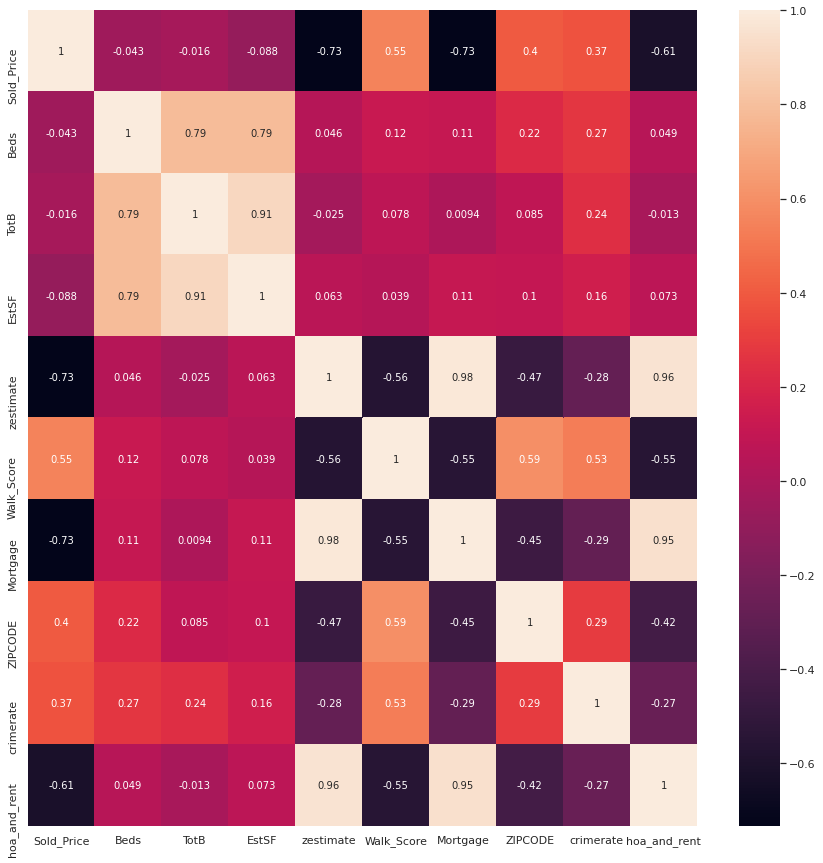

In [ ]:
corr = new_sd_df.corr()

# plot the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot = True)

SO finally after third data enrichment we can see that correlation between other variables has increased , Hence starting the process of clustering to get the golden cluster of desired houses with attributes like Walk Score, Zipcode and crime rate which clearly show high correlation with the sold price.

##**Fractal Clustering**

Things Perfoemed:

*   Applying elbow method to find the ideal number of clusters 
*   Applying GMM clustering for the dataset .
*   Applying Kmeans clustering for the cluster with low price datapoints in best neighbourhoods obtained from GMM.
* We applied Kmeans again for the cluster with low price datapoints in best neighbourhoods obtained from the previous kmeans clustering.

Performing fractal clustering to find the golden cluster contains the houses with low prices in good neighborhood and hence investable 

## **Applying Fractal clustering on Zipcode and Sold Price to find the clusters of low price houses in best neighbourhood to invest in , hence gain profits**

###**Elbow method**

In [ ]:
new_sd_df = new_sd_df[(new_sd_df != 0).all(1)]

In [ ]:
new_sd_df2 =  new_sd_df.copy()


In [ ]:
new_data = new_sd_df[["ZIPCODE","Sold_Price"]]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data)
pd.DataFrame(scaled_data).describe()

,0,1
count,1.460000e+02,1.460000e+02
mean,-1.403535e-13,1.414394e-16
std,1.003442e+00,1.003442e+00
min,-9.582864e-01,-1.416023e+00
25%,-9.387323e-01,-1.415849e+00
50%,-6.454203e-01,4.442709e-01
75%,1.016681e+00,5.993649e-01
max,1.446872e+00,2.328802e+00


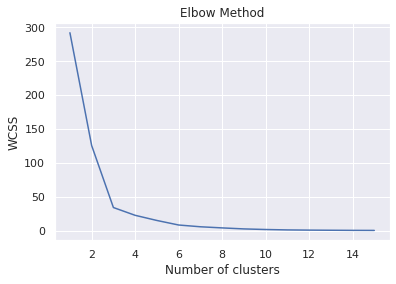

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,  n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Identified, cluster number = 3

### **Applying GMM**

In [ ]:
new_sd_df

,Sold_Price,Full Address,Beds,TotB,EstSF,zestimate,Walk_Score,Mortgage,ZIPCODE,COMMUNITY,crimerate,hoa_and_rent
1,347500,1645 Emerald St APT 2B San Diego CA 92109,1,1,650,349143,94,1790,92109,Mission Beach,62.20,2005.0
3,128,6317 Heritage Dr Carlsbad CA 92009,3,3,2812,1250729,53,5877,92009,Carlsbad,20.61,4565.0
8,127,4814 Nelson Ct Carlsbad CA 92010,4,5,2948,1288625,18,5820,92010,Carlsbad,20.61,4214.0
20,795200,3825 Nautical Dr Carlsbad CA 92008,3,2,1243,815248,57,3471,92008,Carlsbad,20.61,3083.0
22,185,7004 Corintia St Carlsbad CA 92009,4,5,3641,1852247,13,8348,92009,Carlsbad,20.61,7568.0
...,...,...,...,...,...,...,...,...,...,...,...,...
558,434500,4600 Lamont 4-127,2,2,1033,490188,82,2273,92109,Mission Beach,62.20,3008.0
559,474900,4809 Bella Pacific Row 102,2,2,1110,533736,52,2420,92109,Mission Beach,62.20,2981.0
560,495000,4833 Bella Pacific 222,2,2,1094,543427,60,2522,92109,Mission Beach,62.20,2998.0
644,411000,9917 Scripps Westview Way 120,2,2,1052,462240,46,2059,92131,Scripps Ranch,8.42,2545.0


In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None,facecolor='black', **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, facecolor=facecolor, **kwargs))
        
def plot_gmm(gmm, X, xlabel, ylabel,  label=True, ax=None,):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='plasma', zorder=2, marker = '.')
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2, marker = '.')
    ax.axis('auto')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

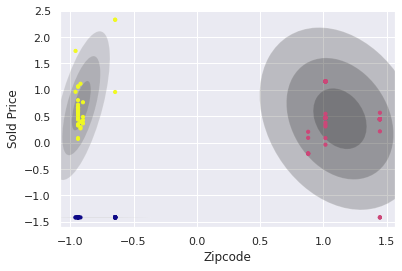

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(scaled_data)
labels = gmm.predict(scaled_data)
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=2)
xlabel = 'Zipcode'
ylabel = 'Sold Price'
plot_gmm(gmm, scaled_data,xlabel,ylabel)

In [ ]:
new_sd_df['Cluster_Number'] = labels
print("GMM Clusters:")
new_sd_df['Cluster_Number'].value_counts()

GMM Clusters:


1    63
0    42
2    41
Name: Cluster_Number, dtype: int64

In [ ]:
kmeans = new_sd_df[['ZIPCODE','Sold_Price','Cluster_Number']]

In [ ]:
Cluster1 = kmeans.loc[kmeans['Cluster_Number'] != 1]
Cluster1

,ZIPCODE,Sold_Price,Cluster_Number
3,92009,128,2
8,92010,127,2
20,92008,795200,0
22,92009,185,2
26,92008,114,2
...,...,...,...
487,92010,456500,0
489,92011,449000,0
490,92011,480000,0
491,92011,464000,0


In [ ]:
kmeans_data1 = Cluster1[["ZIPCODE","Sold_Price"]]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kmeans_scaled1 = scaler.fit_transform(kmeans_data1)

In [ ]:
from sklearn.cluster import KMeans
#def Kmeans_clusters(numOfClusters,data):
kmeans = KMeans(n_clusters=3)
kmeans.fit(kmeans_scaled1)
y_kmeans = kmeans.predict(kmeans_scaled1) 
labels = y_kmeans

Cluster1['Cluster_Number'] = labels
print("K-means Clusters:")
Cluster1['Cluster_Number'].value_counts()

K-means Clusters:


1    41
0    22
2    20
Name: Cluster_Number, dtype: int64

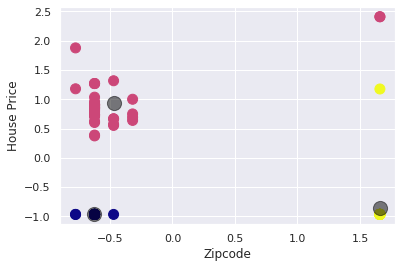

In [ ]:
plt.scatter(kmeans_scaled1[:, 0], kmeans_scaled1[:, 1], c=labels, s=100, cmap='plasma')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('Zipcode')
plt.ylabel('House Price')
plt.show()

In [ ]:
Cluster1

,ZIPCODE,Sold_Price,Cluster_Number
3,92009,128,0
8,92010,127,0
20,92008,795200,1
22,92009,185,0
26,92008,114,0
...,...,...,...
487,92010,456500,1
489,92011,449000,1
490,92011,480000,1
491,92011,464000,1


Thus the cluster 2 is the golden cluster considering its presence in a good neighbourhood and having a low price. 

In [ ]:
Cluster2 = Cluster1.loc[Cluster1['Cluster_Number'] != 1]
Cluster2

,Walk_Score,Sold_Price,Cluster_Number
3,53,128,2
86,58,126,2
100,39,114,2
113,67,475500,0
116,86,650000,0
122,39,114,2
135,67,475500,0
138,86,650000,0
144,39,114,2
151,86,650000,0


## **Applying Fractal clustering on walkscore and price to find the clusters of houses investors would be interested in**

In [ ]:
new_data2 = new_sd_df2[["Walk_Score","Sold_Price"]]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data2 = scaler.fit_transform(new_data2)
pd.DataFrame(scaled_data2).describe()

,0,1
count,1.460000e+02,1.460000e+02
mean,-1.047488e-16,1.414394e-16
std,1.003442e+00,1.003442e+00
min,-1.698048e+00,-1.416023e+00
25%,-8.938072e-01,-1.415849e+00
50%,-1.522348e-01,4.442709e-01
75%,9.444567e-01,5.993649e-01
max,2.145595e+00,2.328802e+00


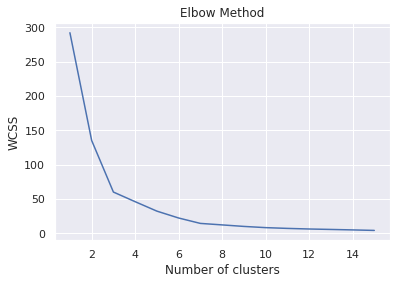

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,  n_init=10, random_state=0)
    kmeans.fit(scaled_data2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Identified, cluster number = 3

### **Applying GMM**

In [ ]:
new_sd_df2

,Sold_Price,Full Address,Beds,TotB,EstSF,zestimate,Walk_Score,Mortgage,ZIPCODE,COMMUNITY,crimerate,hoa_and_rent
1,347500,1645 Emerald St APT 2B San Diego CA 92109,1,1,650,349143,94,1790,92109,Mission Beach,62.20,2005.0
3,128,6317 Heritage Dr Carlsbad CA 92009,3,3,2812,1250729,53,5877,92009,Carlsbad,20.61,4565.0
8,127,4814 Nelson Ct Carlsbad CA 92010,4,5,2948,1288625,18,5820,92010,Carlsbad,20.61,4214.0
20,795200,3825 Nautical Dr Carlsbad CA 92008,3,2,1243,815248,57,3471,92008,Carlsbad,20.61,3083.0
22,185,7004 Corintia St Carlsbad CA 92009,4,5,3641,1852247,13,8348,92009,Carlsbad,20.61,7568.0
...,...,...,...,...,...,...,...,...,...,...,...,...
558,434500,4600 Lamont 4-127,2,2,1033,490188,82,2273,92109,Mission Beach,62.20,3008.0
559,474900,4809 Bella Pacific Row 102,2,2,1110,533736,52,2420,92109,Mission Beach,62.20,2981.0
560,495000,4833 Bella Pacific 222,2,2,1094,543427,60,2522,92109,Mission Beach,62.20,2998.0
644,411000,9917 Scripps Westview Way 120,2,2,1052,462240,46,2059,92131,Scripps Ranch,8.42,2545.0


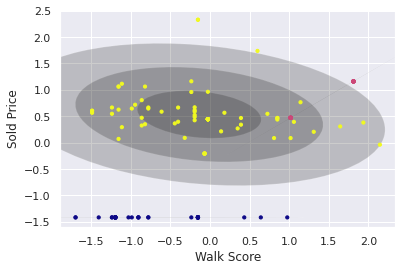

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(scaled_data2)
labels = gmm.predict(scaled_data2)
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=2)
xlabel = 'Walk Score'
ylabel = 'Sold Price'
plot_gmm(gmm, scaled_data2,xlabel,ylabel)

In [ ]:
new_sd_df2['Cluster_Number'] = labels
print("GMM Clusters:")
new_sd_df2['Cluster_Number'].value_counts()

GMM Clusters:


2    73
1    44
0    29
Name: Cluster_Number, dtype: int64

In [ ]:
kmeans = new_sd_df2[['Walk_Score','Sold_Price','Cluster_Number']]

In [ ]:
Cluster1 = kmeans.loc[kmeans['Cluster_Number'] != 2]
Cluster1

,Walk_Score,Sold_Price,Cluster_Number
3,53,128,1
8,18,127,1
22,13,185,1
26,9,114,1
35,2,133,1
...,...,...,...
392,67,475500,0
398,66,114,1
402,21,109,1
403,37,153,1


In [ ]:
kmeans_data1 = Cluster1[["Walk_Score","Sold_Price"]]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kmeans_scaled1 = scaler.fit_transform(kmeans_data1)

In [ ]:
from sklearn.cluster import KMeans
#def Kmeans_clusters(numOfClusters,data):
kmeans = KMeans(n_clusters=3)
kmeans.fit(kmeans_scaled1)
y_kmeans = kmeans.predict(kmeans_scaled1) 
labels = y_kmeans

Cluster1['Cluster_Number'] = labels
print("K-means Clusters:")
Cluster1['Cluster_Number'].value_counts()

K-means Clusters:


0    29
1    26
2    18
Name: Cluster_Number, dtype: int64

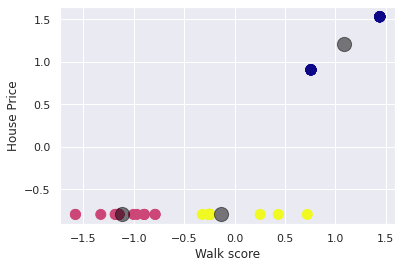

In [ ]:
plt.scatter(kmeans_scaled1[:, 0], kmeans_scaled1[:, 1], c=labels, s=100, cmap='plasma')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('Walk score')
plt.ylabel('House Price')
plt.show()

In [ ]:
Cluster1

,Walk_Score,Sold_Price,Cluster_Number
3,53,128,2
8,18,127,1
22,13,185,1
26,9,114,1
35,2,133,1
...,...,...,...
392,67,475500,0
398,66,114,2
402,21,109,1
403,37,153,2


Thus the Cluster 2 in the 2nd fractal clustering shows the desired golden cluster for investor interested houses

In [ ]:
Cluster2 = Cluster1.loc[Cluster1['Cluster_Number'] != 1]
Cluster2

,Walk_Score,Sold_Price,Cluster_Number
3,53,128,2
86,58,126,2
100,39,114,2
113,67,475500,0
116,86,650000,0
122,39,114,2
135,67,475500,0
138,86,650000,0
144,39,114,2
151,86,650000,0


###**Silhouette  Score**
This is a better measure to decide the number of clusters to be formulated from the data. It is calculated for each instance and the formula:      
Silhouette Coefficient = (x-y)/ max(x,y)      
where, y is the mean intra cluster distance: mean distance to the other instances in the same cluster. x depicts mean nearest cluster distance i.e. mean distance to the instances of the next closest cluster.

In [ ]:
silhouttedf = new_sd_df.drop(['zestimate','Full Address','COMMUNITY'], axis=1)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg =[]
for i in range(2, 6):
    gmm = GaussianMixture(n_components = i, covariance_type='full', random_state=0).fit(silhouttedf)
    gmm_predict = gmm.fit_predict(silhouttedf)
    avg = silhouette_score(silhouttedf, gmm_predict)
    silhouette_avg.append(avg)
    print("For n_clusters =", i,
          "The average silhouette_score is :", avg)

For n_clusters = 2 The average silhouette_score is : 0.8393135608258935
For n_clusters = 3 The average silhouette_score is : 0.46179424599147967
For n_clusters = 4 The average silhouette_score is : 0.45490217725174076
For n_clusters = 5 The average silhouette_score is : 0.47783909492169246


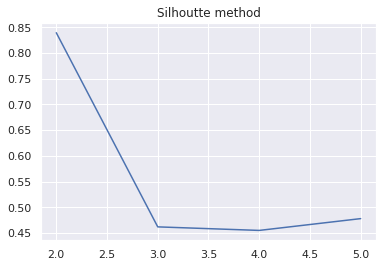

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2, 6), silhouette_avg)
plt.title('Silhoutte method')
plt.show()

Printing the dataset with cluster numbers.

In [ ]:
new_sd_df

,Sold_Price,Full Address,Beds,TotB,EstSF,zestimate,Walk_Score,Mortgage,ZIPCODE,COMMUNITY,crimerate,hoa_and_rent,Cluster_Number
1,347500,1645 Emerald St APT 2B San Diego CA 92109,1,1,650,349143,94,1790,92109,Mission Beach,62.20,2005.0,1
3,128,6317 Heritage Dr Carlsbad CA 92009,3,3,2812,1250729,53,5877,92009,Carlsbad,20.61,4565.0,0
8,127,4814 Nelson Ct Carlsbad CA 92010,4,5,2948,1288625,18,5820,92010,Carlsbad,20.61,4214.0,0
20,795200,3825 Nautical Dr Carlsbad CA 92008,3,2,1243,815248,57,3471,92008,Carlsbad,20.61,3083.0,2
22,185,7004 Corintia St Carlsbad CA 92009,4,5,3641,1852247,13,8348,92009,Carlsbad,20.61,7568.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,434500,4600 Lamont 4-127,2,2,1033,490188,82,2273,92109,Mission Beach,62.20,3008.0,1
559,474900,4809 Bella Pacific Row 102,2,2,1110,533736,52,2420,92109,Mission Beach,62.20,2981.0,1
560,495000,4833 Bella Pacific 222,2,2,1094,543427,60,2522,92109,Mission Beach,62.20,2998.0,1
644,411000,9917 Scripps Westview Way 120,2,2,1052,462240,46,2059,92131,Scripps Ranch,8.42,2545.0,1


In [ ]:
new_sd_df2

,Sold_Price,Full Address,Beds,TotB,EstSF,zestimate,Walk_Score,Mortgage,ZIPCODE,COMMUNITY,crimerate,hoa_and_rent,Cluster_Number
1,347500,1645 Emerald St APT 2B San Diego CA 92109,1,1,650,349143,94,1790,92109,Mission Beach,62.20,2005.0,2
3,128,6317 Heritage Dr Carlsbad CA 92009,3,3,2812,1250729,53,5877,92009,Carlsbad,20.61,4565.0,1
8,127,4814 Nelson Ct Carlsbad CA 92010,4,5,2948,1288625,18,5820,92010,Carlsbad,20.61,4214.0,1
20,795200,3825 Nautical Dr Carlsbad CA 92008,3,2,1243,815248,57,3471,92008,Carlsbad,20.61,3083.0,2
22,185,7004 Corintia St Carlsbad CA 92009,4,5,3641,1852247,13,8348,92009,Carlsbad,20.61,7568.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,434500,4600 Lamont 4-127,2,2,1033,490188,82,2273,92109,Mission Beach,62.20,3008.0,2
559,474900,4809 Bella Pacific Row 102,2,2,1110,533736,52,2420,92109,Mission Beach,62.20,2981.0,2
560,495000,4833 Bella Pacific 222,2,2,1094,543427,60,2522,92109,Mission Beach,62.20,2998.0,2
644,411000,9917 Scripps Westview Way 120,2,2,1052,462240,46,2059,92131,Scripps Ranch,8.42,2545.0,2


##**Dimensionality reduction using Principal Component Analysis(PCA)**

PCA is an unsupervised linear dimensionality reduction algorithm to find a more meaningful basis or coordinate system for our data and works based on covariance matrix to find the strongest features of the samples .



In [ ]:
from sklearn.decomposition import PCA 
# Apply GMM on PCA dataset
def PCAplt(df,labels,algo):
    pca = PCA(n_components = 2).fit_transform(df)
    plt.figure(figsize=(6,6))
    plt.scatter(pca[:,0],pca[:,1], c = labels,cmap='rainbow')
    plt.title('Clustering %s' %algo)
    plt.xlabel("PC1")
    plt.ylabel("PC2")

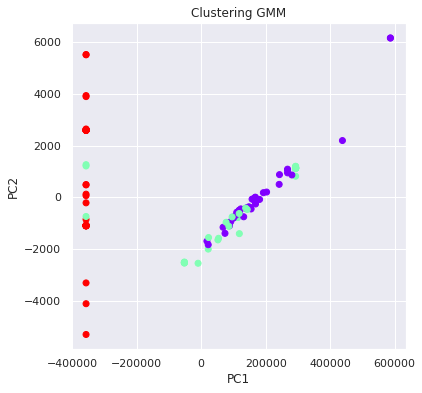

In [ ]:
PCAplt(silhouttedf,silhouttedf['Cluster_Number'],'GMM')

## **Latent Variables or Latent Manifolds**

A latent variable is a variable that is inferred using models from observed data. 

For the san diego housing dataset, It is identified that the neighborhood information like walk score, crime rate, and best communities (with high average annual selling price) as our latent variables.



##Linear Regression

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, rather than trying to classify them into categories. 

Applying with a non-latent variable

Splitting the data in training and testing data

In [ ]:
#Creating X and y
X = new_sd_df[['EstSF']]
y = new_sd_df[['Sold_Price']]

from sklearn.model_selection import train_test_split

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.score(X_test, y_test)

-0.0987439627031308

Visualizing the linear regression results:

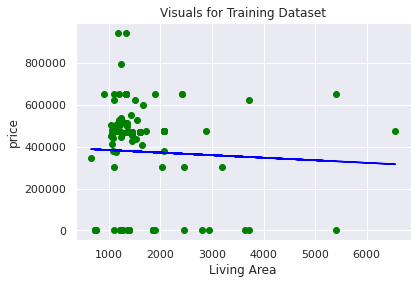

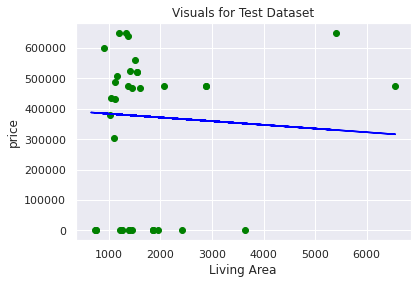

In [ ]:
y_pred = regression_model.predict(X_test) 

#Visualizing the training Test Results 
plt.scatter(X_train, y_train, color= 'green')
plt.plot(X_train, regression_model.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Living Area")
plt.ylabel("price")
plt.show()

#Visualizing the Test Results 
plt.scatter(X_test, y_test, color= 'green')
plt.plot(X_train, regression_model.predict(X_train), color = 'blue')
plt.title ("Visuals for Test Dataset")
plt.xlabel("Living Area")
plt.ylabel("price")
plt.show()


**Applying Linear regression with latent variable-neighborhood data**:  
* Fit the model on the training set.  
* Finding  R-squared value

Applying with a latent variable i.e Walk score

In [ ]:
#Creating X and y
X = new_sd_df[['Walk_Score']]
y = new_sd_df[['Sold_Price']]

from sklearn.model_selection import train_test_split

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.score(X_test, y_test)

0.14467285684355746

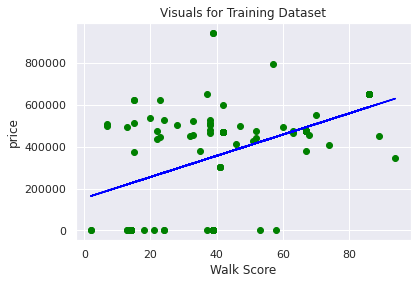

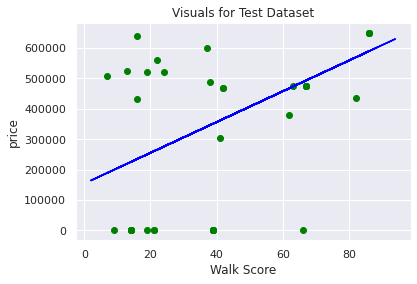

In [ ]:
y_pred = regression_model.predict(X_test) 

#Visualizing the training Test Results 
plt.scatter(X_train, y_train, color= 'green')
plt.plot(X_train, regression_model.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Walk Score")
plt.ylabel("price")
plt.show()

#Visualizing the Test Results 
plt.scatter(X_test, y_test, color= 'green')
plt.plot(X_train, regression_model.predict(X_train), color = 'blue')
plt.title ("Visuals for Test Dataset")
plt.xlabel("Walk Score")
plt.ylabel("price")
plt.show()

Appending the calculated categorical 'investment property' column where

0 - House price(HOA+rent) below mortgage

1 - House price(HOA+rent) above mortage

In [ ]:
SD_data

,Sold_Price,Full Address,Beds,TotB,EstSF,zestimate,Rent,HOA,Walk_Score,Mortgage,ZIPCODE,COMMUNITY,crimerate,hoa_and_rent
1,347500,1645 Emerald St APT 2B San Diego CA 92109,1,1,650,349143,1700,305,94,1790,92109,Mission Beach,62.2,2005.0
3,128,6317 Heritage Dr Carlsbad CA 92009,3,3,2812,1250729,4300,265,53,5877,92009,Carlsbad,20.61,4565.0
8,127,4814 Nelson Ct Carlsbad CA 92010,4,5,2948,1288625,3944,270,18,5820,92010,Carlsbad,20.61,4214.0
15,305000,3050 Rue Dorleans UNIT 213 San Diego CA 92110,1,1,547,299668,1650,336,67,1639,92110,Bay Park,0,1986.0
20,795200,3825 Nautical Dr Carlsbad CA 92008,3,2,1243,815248,2975,108,57,3471,92008,Carlsbad,20.61,3083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,599888,3505 Monair Dr A,3,2,1236,596351,2600,401,38,2926,92117,Bay Park,0,3001.0
605,495000,3707 Balboa Terrace A,2,2,1241,558442,2500,450,51,2574,92117,Bay Park,0,2950.0
606,516500,4166 Balboa Way,3,3,1872,582379,3000,440,82,2657,92117,Bay Park,0,3440.0
644,411000,9917 Scripps Westview Way 120,2,2,1052,462240,2250,295,46,2059,92131,Scripps Ranch,8.42,2545.0


In [ ]:
#SD_data['hoa_and_rent'] 
for i in SD_data.index:
  hoa = SD_data.at[i,"HOA"]
  rent= SD_data.at[i,"Rent"]
  hoa_and_rent= hoa + rent
  SD_data.at[i,"hoa_and_rent"]= hoa_and_rent

SD_data

,Sold_Price,Full Address,Beds,TotB,EstSF,zestimate,Rent,HOA,Walk_Score,Mortgage,ZIPCODE,COMMUNITY,crimerate,hoa_and_rent
1,347500,1645 Emerald St APT 2B San Diego CA 92109,1,1,650,349143,1700,305,94,1790,92109,Mission Beach,62.2,2005.0
3,128,6317 Heritage Dr Carlsbad CA 92009,3,3,2812,1250729,4300,265,53,5877,92009,Carlsbad,20.61,4565.0
8,127,4814 Nelson Ct Carlsbad CA 92010,4,5,2948,1288625,3944,270,18,5820,92010,Carlsbad,20.61,4214.0
15,305000,3050 Rue Dorleans UNIT 213 San Diego CA 92110,1,1,547,299668,1650,336,67,1639,92110,Bay Park,0,1986.0
20,795200,3825 Nautical Dr Carlsbad CA 92008,3,2,1243,815248,2975,108,57,3471,92008,Carlsbad,20.61,3083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,599888,3505 Monair Dr A,3,2,1236,596351,2600,401,38,2926,92117,Bay Park,0,3001.0
605,495000,3707 Balboa Terrace A,2,2,1241,558442,2500,450,51,2574,92117,Bay Park,0,2950.0
606,516500,4166 Balboa Way,3,3,1872,582379,3000,440,82,2657,92117,Bay Park,0,3440.0
644,411000,9917 Scripps Westview Way 120,2,2,1052,462240,2250,295,46,2059,92131,Scripps Ranch,8.42,2545.0


In [ ]:
SD_data["investment_property"] = 0

for index, row in SD_data.iterrows():
    hoa_and_rent=row['hoa_and_rent']
    mortgage=row['Mortgage']
    walkscore=row['Walk_Score']
    investable=0
    if((hoa_and_rent >= mortgage) and (walkscore > 40) ):
      investable=1
      print(index)

    SD_data.at[index, 'investment_property'] = investable

SD_data[50:80]

In [ ]:
SD_data

,Sold_Price,Full Address,Beds,TotB,EstSF,zestimate,Rent,HOA,Walk_Score,Mortgage,ZIPCODE,COMMUNITY,crimerate,hoa_and_rent,investment_property
1,347500,1645 Emerald St APT 2B San Diego CA 92109,1,1,650,349143,1700,305,94,1790,92109,Mission Beach,62.2,2005.0,1
3,128,6317 Heritage Dr Carlsbad CA 92009,3,3,2812,1250729,4300,265,53,5877,92009,Carlsbad,20.61,4565.0,0
8,127,4814 Nelson Ct Carlsbad CA 92010,4,5,2948,1288625,3944,270,18,5820,92010,Carlsbad,20.61,4214.0,0
15,305000,3050 Rue Dorleans UNIT 213 San Diego CA 92110,1,1,547,299668,1650,336,67,1639,92110,Bay Park,0,1986.0,1
20,795200,3825 Nautical Dr Carlsbad CA 92008,3,2,1243,815248,2975,108,57,3471,92008,Carlsbad,20.61,3083.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,599888,3505 Monair Dr A,3,2,1236,596351,2600,401,38,2926,92117,Bay Park,0,3001.0,0
605,495000,3707 Balboa Terrace A,2,2,1241,558442,2500,450,51,2574,92117,Bay Park,0,2950.0,1
606,516500,4166 Balboa Way,3,3,1872,582379,3000,440,82,2657,92117,Bay Park,0,3440.0,1
644,411000,9917 Scripps Westview Way 120,2,2,1052,462240,2250,295,46,2059,92131,Scripps Ranch,8.42,2545.0,0


In [ ]:
SD_data.describe()

,Sold_Price,Beds,TotB,EstSF,zestimate,Rent,HOA,Walk_Score,Mortgage,ZIPCODE,hoa_and_rent,investment_property
count,183.000000,183.000000,183.000000,183.000000,1.830000e+02,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,344071.163934,2.726776,2.573770,1720.584699,8.142284e+05,3459.142077,301.355191,42.437158,3618.426230,92061.530055,3760.497268,0.273224
std,253652.912596,0.884354,1.224193,1063.641047,4.810916e+05,1528.360280,140.718133,24.775146,1802.141429,49.581966,1469.102316,0.446837
min,109.000000,1.000000,1.000000,547.000000,1.991480e+05,1550.000000,47.000000,2.000000,1166.000000,92008.000000,1785.000000,0.000000
25%,153.000000,2.000000,2.000000,1183.000000,4.760250e+05,2572.500000,241.000000,19.000000,2357.000000,92009.000000,2917.000000,0.000000
50%,469000.000000,3.000000,2.000000,1382.000000,5.855020e+05,2695.000000,325.000000,39.000000,2651.000000,92037.000000,3135.000000,0.000000
75%,506183.500000,3.000000,3.000000,1853.000000,1.136254e+06,3750.000000,398.500000,67.000000,5031.000000,92109.000000,3805.000000,1.000000
max,944000.000000,5.000000,8.000000,6558.000000,2.151583e+06,8268.000000,650.000000,94.000000,9676.000000,92131.000000,8518.000000,1.000000


In [ ]:
SD_data['investment_property'].value_counts()

0    111
1     72
Name: investment_property, dtype: int64

In [ ]:
targets = SD_data['investment_property']
target_data = SD_data.drop(['zestimate','Rent','HOA','Full Address','COMMUNITY'], axis=1)
target_data

,Sold_Price,Beds,TotB,EstSF,Walk_Score,Mortgage,ZIPCODE,crimerate,hoa_and_rent,investment_property
1,347500,1,1,650,94,1790,92109,62.2,2005.0,1
3,128,3,3,2812,53,5877,92009,20.61,4565.0,0
8,127,4,5,2948,18,5820,92010,20.61,4214.0,0
15,305000,1,1,547,67,1639,92110,0,1986.0,1
20,795200,3,2,1243,57,3471,92008,20.61,3083.0,0
...,...,...,...,...,...,...,...,...,...,...
603,599888,3,2,1236,38,2926,92117,0,3001.0,0
605,495000,2,2,1241,51,2574,92117,0,2950.0,1
606,516500,3,3,1872,82,2657,92117,0,3440.0,1
644,411000,2,2,1052,46,2059,92131,8.42,2545.0,1


In [ ]:
unscaled_data = target_data.iloc[:,:-1]
unscaled_data

,Sold_Price,Beds,TotB,EstSF,Walk_Score,Mortgage,ZIPCODE,crimerate,hoa_and_rent
1,347500,1,1,650,94,1790,92109,62.2,2005.0
3,128,3,3,2812,53,5877,92009,20.61,4565.0
8,127,4,5,2948,18,5820,92010,20.61,4214.0
15,305000,1,1,547,67,1639,92110,0,1986.0
20,795200,3,2,1243,57,3471,92008,20.61,3083.0
...,...,...,...,...,...,...,...,...,...
603,599888,3,2,1236,38,2926,92117,0,3001.0
605,495000,2,2,1241,51,2574,92117,0,2950.0
606,516500,3,3,1872,82,2657,92117,0,3440.0
644,411000,2,2,1052,46,2059,92131,8.42,2545.0


In [ ]:
unscaled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 646
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sold_Price    183 non-null    int64  
 1   Beds          183 non-null    int64  
 2   TotB          183 non-null    int64  
 3   EstSF         183 non-null    int64  
 4   Walk_Score    183 non-null    int64  
 5   Mortgage      183 non-null    int64  
 6   ZIPCODE       183 non-null    int64  
 7   crimerate     183 non-null    object 
 8   hoa_and_rent  183 non-null    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 19.3+ KB


In [ ]:
from sklearn.model_selection import train_test_split
unscaledX_train, unscaledX_test, unscaledY_train, unscaledY_test = train_test_split(unscaled_data, targets, train_size = 0.8)
unscaledX_train = np.array(unscaledX_train)
unscaledY_train = np.array(unscaledY_train)
unscaledX_test = np.array(unscaledX_test)
unscaledY_test = np.array(unscaledY_test)

## **Decision Tree**

Decision tree builds classification or regression models in the form of a tree structure. It utilizes an if-then rule set which is mutually exclusive and exhaustive for classification. The rules are learned sequentially using the training data one at a time. Each time a rule is learned, the tuples covered by the rules are removed. This process is continued on the training set until meeting a termination condition.

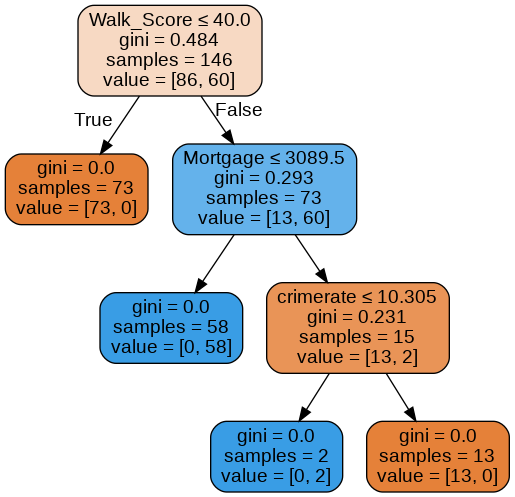

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(unscaledX_train, unscaledY_train)
rf = RandomForestClassifier()
rf.fit(unscaledX_train, unscaledY_train)
y_prediction = rf.predict(unscaledX_test)
y_pred_proba3 = rf.predict_proba(unscaledX_test)[:, 1]
acc_randomforest = round(accuracy_score(y_prediction, unscaledY_test) * 100, 2)

# We are seperating the data that we want to use to predict from the target.
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True, feature_names = unscaled_data.columns.values)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

##**Feature importance with Gini Score**

In [ ]:
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
from eli5 import explain_weights

In [ ]:

clf_to_explain = rf
try:
    rf.__getattribute__("get_booster")
    clf_to_explain = rf.get_booster()
except AttributeError:
    pass

In [ ]:
unscaled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 646
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sold_Price    183 non-null    int64  
 1   Beds          183 non-null    int64  
 2   TotB          183 non-null    int64  
 3   EstSF         183 non-null    int64  
 4   Walk_Score    183 non-null    int64  
 5   Mortgage      183 non-null    int64  
 6   ZIPCODE       183 non-null    int64  
 7   crimerate     183 non-null    object 
 8   hoa_and_rent  183 non-null    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 19.3+ KB


Calculating feature permutations and importance

In [ ]:
feature_names = unscaled_data.columns.values 
explain_weights(rf, feature_names=feature_names)

Weight,Feature
0.4465 ± 0.4844,Walk_Score
0.2238 ± 0.3851,Mortgage
0.0872 ± 0.2321,hoa_and_rent
0.0820 ± 0.2157,Sold_Price
0.0677 ± 0.1943,crimerate
0.0588 ± 0.1988,ZIPCODE
0.0178 ± 0.0792,EstSF
0.0108 ± 0.0732,TotB
0.0053 ± 0.0346,Beds


[0.09374245 0.00707891 0.00672212 0.03178879 0.36060182 0.19721892
 0.14461883 0.02714452 0.13108363]


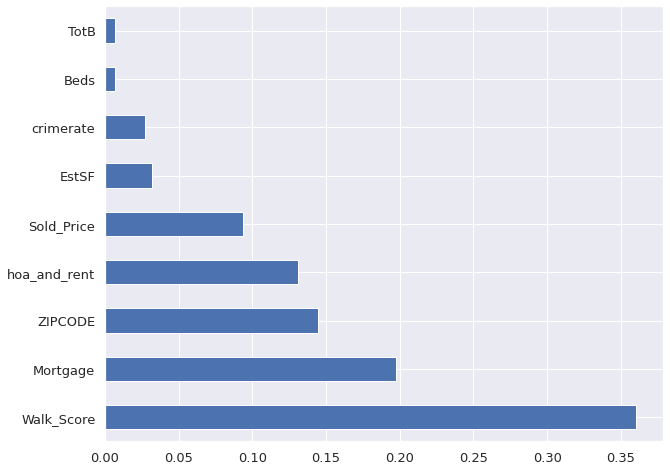

In [ ]:
print(rf.feature_importances_)
#plot graph of feature importances for better visualization
plt.figure(figsize=(10,8))
feat_importances = pd.Series(rf.feature_importances_, index=unscaled_data.columns)
feat_importances.nlargest(20).plot(kind='barh',fontsize=13)
plt.show()

## **Feature transformation**

In [ ]:
from sklearn.svm import SVC
import time
start_time = time.time()
clf = SVC(gamma=2, C=1).fit(unscaledX_train, unscaledY_train)
score = 100.0 * clf.score(unscaledX_test, unscaledY_test)
name = "RBF SVM"
print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))


Classifier = RBF SVM, Score (test, accuracy) = 78.38, Training time = 0.03 seconds


In [ ]:
from sklearn.preprocessing import StandardScaler
col = ['Walk_Score','ZIPCODE','EstSF']
features3= unscaled_data[col]
scaler = StandardScaler()
scaler.fit(features3)
StandardScaler(copy=True, with_mean=True, with_std=True)
features3 = scaler.transform(features3)
features3


array([[ 2.08694247,  0.96003008, -1.00928959],
       [ 0.42751799, -1.06236551,  1.02892756],
       [-0.98906387, -1.04214155,  1.15714103],
       [ 0.99415074,  0.98025403, -1.10639244],
       [ 0.58941306, -1.08258946, -0.45024113],
       [-1.19143271, -1.06236551,  1.81046411],
       [-1.35332778, -1.08258946,  0.65842833],
       [-0.13911475, -0.75900617, -0.36916496],
       [-1.11048518, -1.06236551, -0.20701263],
       [-1.63664416,  1.40495711,  3.46781182],
       [-1.63664416,  1.40495711,  0.69236719],
       [-1.19143271, -1.06236551, -0.3474818 ],
       [-1.11048518, -1.06236551,  1.88211281],
       [-0.13911475, -0.75900617, -0.51151963],
       [-0.78669504, -1.06236551, -0.57939735],
       [-0.22006229, -0.75900617, -0.76794658],
       [ 0.95367697, -0.49609474,  2.22810065],
       [ 0.99415074,  0.96003008,  0.33129542],
       [-0.86764257, -0.75900617,  0.2125094 ],
       [-0.74622127, -0.75900617,  0.15594464],
       [-0.86764257, -0.75900617, -0.588

In [ ]:
scaledx_train, scaledx_test, scaledy_train, scaledy_test = train_test_split(features3, targets, train_size = 0.8)
scaledX_train = np.array(scaledx_train)
scaledy_train = np.array(scaledy_train)
scaledx_test = np.array(scaledx_test)
scaledy_test = np.array(scaledy_test)

In [ ]:
from sklearn.svm import SVC
import time
start_time = time.time()
clf = SVC(gamma=2, C=1).fit(scaledX_train, scaledy_train)
score = 100.0 * clf.score(scaledx_test, scaledy_test)
name = "RBF SVM"
print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))

Classifier = RBF SVM, Score (test, accuracy) = 89.19, Training time = 0.00 seconds


In [ ]:
col = ['Walk_Score','ZIPCODE','crimerate','EstSF','hoa_and_rent']
features5= unscaled_data[col]
scaler = StandardScaler()
scaler.fit(features5)
StandardScaler(copy=True, with_mean=True, with_std=True)
features5 = scaler.transform(features5)
features5

array([[ 2.08694247,  0.96003008,  1.79554985, -1.00928959, -1.19822387],
       [ 0.42751799, -1.06236551, -0.1193744 ,  1.02892756,  0.54911756],
       [-0.98906387, -1.04214155, -0.1193744 ,  1.15714103,  0.30954067],
       [ 0.99415074,  0.98025403, -1.06831859, -1.10639244, -1.21119242],
       [ 0.58941306, -1.08258946, -0.1193744 , -0.45024113, -0.46242931],
       [-1.19143271, -1.06236551, -0.1193744 ,  1.81046411,  2.59883096],
       [-1.35332778, -1.08258946, -0.1193744 ,  0.65842833,  0.20783994],
       [-0.13911475, -0.75900617, -0.56645097, -0.36916496,  1.61663396],
       [-1.11048518, -1.06236551, -0.1193744 , -0.20701263, -0.29042539],
       [-1.63664416,  1.40495711, -0.68063736,  3.46781182,  1.62755484],
       [-1.63664416,  1.40495711, -0.68063736,  0.69236719,  1.62755484],
       [-1.19143271, -1.06236551, -0.1193744 , -0.3474818 ,  2.59883096],
       [-1.11048518, -1.06236551, -0.1193744 ,  1.88211281, -0.29042539],
       [-0.13911475, -0.75900617, -0.5

In [ ]:
scaledx_train, scaledx_test, scaledy_train, scaledy_test = train_test_split(features5, targets, train_size = 0.8)
scaledX_train = np.array(scaledx_train)
scaledy_train = np.array(scaledy_train)
scaledx_test = np.array(scaledx_test)
scaledy_test = np.array(scaledy_test)

In [ ]:
from sklearn.svm import SVC
import time
start_time = time.time()
clf = SVC(gamma=2, C=1).fit(scaledX_train, scaledy_train)
score = 100.0 * clf.score(scaledx_test, scaledy_test)
name = "RBF SVM"
print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))

Classifier = RBF SVM, Score (test, accuracy) = 89.19, Training time = 0.01 seconds


Applied SVM with kernal trick on the original unscaled data and the accurancy is 89.05%.

Accuracy with 4 features : 78

Accuracy with 5 features : 89 ( adding hoa+rent)

Applied SVM with kernal trick on the data enrichment and data normalization. The accuracy score with all features is 89   

We can see that the accuracy has increased after data transformation.

**Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [ ]:
unscaled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 646
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sold_Price    183 non-null    int64  
 1   Beds          183 non-null    int64  
 2   TotB          183 non-null    int64  
 3   EstSF         183 non-null    int64  
 4   Walk_Score    183 non-null    int64  
 5   Mortgage      183 non-null    int64  
 6   ZIPCODE       183 non-null    int64  
 7   crimerate     183 non-null    object 
 8   hoa_and_rent  183 non-null    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 19.3+ KB


In [ ]:
unscaled_data = unscaled_data.drop(['Sold_Price','Mortgage'],axis=1)

In [ ]:
unscaled_data['ZIPCODE'] = unscaled_data['ZIPCODE'].astype(float)
unscaled_data['Beds'] = unscaled_data['Beds'].astype(float)
unscaled_data['TotB'] = unscaled_data['TotB'].astype(float)
unscaled_data['EstSF'] = unscaled_data['EstSF'].astype(float)
unscaled_data['crimerate'] = unscaled_data['crimerate'].astype(float)
unscaled_data['Walk_Score'] = unscaled_data['Walk_Score'].astype(float)

In [ ]:
scaler.fit(unscaled_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_inputs = scaler.transform(unscaled_data)

In [ ]:
scaled_inputs

array([[-1.95794231, -1.28908424, -1.00928959, ...,  0.96003008,
         1.79554985, -1.19822387],
       [ 0.309801  ,  0.34912698,  1.02892756, ..., -1.06236551,
        -0.1193744 ,  0.54911756],
       [ 1.44367265,  1.98733821,  1.15714103, ..., -1.04214155,
        -0.1193744 ,  0.30954067],
       ...,
       [ 0.309801  ,  0.34912698,  0.14274619, ...,  1.12182173,
        -1.06831859, -0.21875709],
       [-0.82407066, -0.46997863, -0.63030564, ...,  1.40495711,
        -0.68063736, -0.82964403],
       [-0.82407066, -0.46997863, -0.61050797, ...,  1.40495711,
        -0.68063736, -0.64057623]])

In [ ]:
scaled_inputs.shape

(183, 7)

Splitting the data into train and test sets (80% train, 20% data)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, random_state = 18)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
scaled_inputs

array([[-1.95794231, -1.28908424, -1.00928959, ...,  0.96003008,
         1.79554985, -1.19822387],
       [ 0.309801  ,  0.34912698,  1.02892756, ..., -1.06236551,
        -0.1193744 ,  0.54911756],
       [ 1.44367265,  1.98733821,  1.15714103, ..., -1.04214155,
        -0.1193744 ,  0.30954067],
       ...,
       [ 0.309801  ,  0.34912698,  0.14274619, ...,  1.12182173,
        -1.06831859, -0.21875709],
       [-0.82407066, -0.46997863, -0.63030564, ...,  1.40495711,
        -0.68063736, -0.82964403],
       [-0.82407066, -0.46997863, -0.61050797, ...,  1.40495711,
        -0.68063736, -0.64057623]])

Performing logistic regression

In [ ]:
# Logistic Regression Model Fitting

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8648648648648649


we have achieved an accuracy score of **0.96**




In [ ]:
test_properties = pd.read_csv('/content/drive/My Drive/Midterm/Properties.csv')

In [ ]:
test_properties

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,photo_count,zestimate,rent_zestimate,days_on_zillow,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url
0,415,17199778,"4060 Huerfano Ave UNIT 311, San Diego, CA 92117",32.814695,-117.217324,299000.0,USD,1.0,1.0,613.0 sqft,NaN,299001.0,1695.0,8,False,https://www.zillowstatic.com/static/images/nop...,Condo for sale,Knopp Coastal Realty,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/4060-Huerfa...,"https://www.zillow.com/homes/San-Diego,-CA_rb/..."
1,700,69020669,"445 Island Ave UNIT 623, San Diego, CA 92101",32.710141,-117.160570,459900.0,USD,1.0,1.0,832.0 sqft,NaN,459762.0,2600.0,17,False,https://www.zillowstatic.com/static/images/nop...,Condo for sale,Berkshire Hathaway HomeService,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/445-Island-...,"https://www.zillow.com/homes/San-Diego,-CA_rb/..."
2,33,16800227,"12005 World Trade Dr UNIT 4, San Diego, CA 92128",32.980385,-117.074339,699900.0,USD,3.0,3.0,1723.0 sqft,NaN,708847.0,3195.0,0,False,https://www.zillowstatic.com/static/images/nop...,Townhouse for sale,Corcoran Global Living,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/12005-World...,"https://www.zillow.com/homes/San-Diego,-CA_rb/"
3,235,17162753,"730 My Way, San Diego, CA 92154",32.582941,-117.079509,675000.0,USD,3.0,3.0,2188.0 sqft,NaN,675006.0,3000.0,3,False,https://www.zillowstatic.com/static/images/nop...,Foreclosure,Century 21 Award,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/730-My-Way-...,"https://www.zillow.com/homes/San-Diego,-CA_rb/..."
4,559,17005253,"4264 51st St, San Diego, CA 92115",32.754261,-117.085077,549000.0,USD,2.0,4.0,1362.0 sqft,NaN,558996.0,2395.0,11,False,https://www.zillowstatic.com/static/images/nop...,Multi-family home for sale,Regional Realty & Investments,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/4264-51st-S...,"https://www.zillow.com/homes/San-Diego,-CA_rb/..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,361,16851073,"1212 Muirlands Vista Way, La Jolla, CA 92037",32.829616,-117.264512,3100000.0,USD,4.0,3.0,2847.0 sqft,NaN,3008311.0,9241.0,6,False,https://www.zillowstatic.com/static/images/nop...,House for sale,Berkshire Hathaway HomeService,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/1212-Muirla...,"https://www.zillow.com/homes/San-Diego,-CA_rb/..."
1728,216,17076695,"1604 Grove St, San Diego, CA 92102",32.722507,-117.128690,1149000.0,USD,3.0,3.0,1543.0 sqft,NaN,1150026.0,3695.0,2,False,https://www.zillowstatic.com/static/images/nop...,House for sale,Aperture Real Estate Services,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/1604-Grove-...,"https://www.zillow.com/homes/San-Diego,-CA_rb/..."
1729,245,16952477,"4310 Goldfinch St, San Diego, CA 92103",32.755963,-117.171701,1499900.0,USD,2.0,4.0,1988.0 sqft,NaN,1522900.0,3699.0,3,False,https://www.zillowstatic.com/static/images/nop...,House for sale,Redfin Corporation,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/4310-Goldfi...,"https://www.zillow.com/homes/San-Diego,-CA_rb/..."
1730,135,16946003,"1375 Caminito Gabaldon UNIT H, San Diego, CA 9...",32.772356,-117.151321,249000.0,USD,1.0,0.0,506.0 sqft,NaN,249000.0,1500.0,1,False,https://www.zillowstatic.com/static/images/nop...,Condo for sale,Keller Williams Realty,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/1375-Camini...,"https://www.zillow.com/homes/San-Diego,-CA_rb/..."


In [ ]:
test_amalgamation = pd.read_csv('/content/drive/My Drive/Midterm/Test_data_Amalgamation.csv')

In [ ]:
test_amalgamation

,Unnamed: 0,price,address,bathrooms,bedrooms,area,zestimate,rent_zestimate,listing_type,property_url,ZIP,HOA,Walk_Score
0,0,299000.0,"4060 Huerfano Ave UNIT 311, San Diego, CA 92117",1.0,1.0,613.0 sqft,299001.0,1695.0,Condo for sale,https://www.zillow.com/homedetails/4060-Huerfa...,92117,330,54
1,1,459900.0,"445 Island Ave UNIT 623, San Diego, CA 92101",1.0,1.0,832.0 sqft,459762.0,2600.0,Condo for sale,https://www.zillow.com/homedetails/445-Island-...,92101,427,97
2,2,699900.0,"12005 World Trade Dr UNIT 4, San Diego, CA 92128",3.0,3.0,1723.0 sqft,708847.0,3195.0,Townhouse for sale,https://www.zillow.com/homedetails/12005-World...,92128,345,82
3,3,675000.0,"730 My Way, San Diego, CA 92154",3.0,3.0,2188.0 sqft,675006.0,3000.0,Foreclosure,https://www.zillow.com/homedetails/730-My-Way-...,92154,0,46
4,4,549000.0,"4264 51st St, San Diego, CA 92115",2.0,4.0,1362.0 sqft,558996.0,2395.0,Multi-family home for sale,https://www.zillow.com/homedetails/4264-51st-S...,92115,252,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,1727,3100000.0,"1212 Muirlands Vista Way, La Jolla, CA 92037",4.0,3.0,2847.0 sqft,3008311.0,9241.0,House for sale,https://www.zillow.com/homedetails/1212-Muirla...,92037,0,7
1728,1728,1149000.0,"1604 Grove St, San Diego, CA 92102",3.0,3.0,1543.0 sqft,1150026.0,3695.0,House for sale,https://www.zillow.com/homedetails/1604-Grove-...,92102,0,85
1729,1729,1499900.0,"4310 Goldfinch St, San Diego, CA 92103",2.0,4.0,1988.0 sqft,1522900.0,3699.0,House for sale,https://www.zillow.com/homedetails/4310-Goldfi...,92103,0,49
1730,1730,249000.0,"1375 Caminito Gabaldon UNIT H, San Diego, CA 9...",1.0,0.0,506.0 sqft,249000.0,1500.0,Condo for sale,https://www.zillow.com/homedetails/1375-Camini...,92108,210,77


In [ ]:
test_amalgamation = test_amalgamation.loc[:, ~test_amalgamation.columns.str.contains('^Unnamed')]

Sigmoid function can be used for Classification type problems, where we scale the data in some given range with the threshold, where it adjusts all the data points between 0 and 1. We want to have the output of the Logistic Regression Algorithm to be class variable in our case which is Rating as

0 - House price below median value

1 - House price above median value.

The S-curve below depicts sigmoid function for the Train data present in our housing price data set.

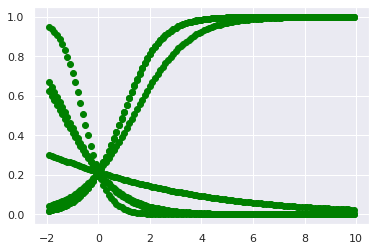

In [ ]:
# Plotting sigmoid function 
import numpy as np
from matplotlib import pyplot as plt
def model(lr,x_train):
    return 1/(1 + np.exp(-(lr.intercept_+lr.coef_*x_train)))
for i in range(1,120,1):
    plt.plot(i/10.0-2,model(lr,i/10.0-2),'ro',color='green')

Here, Data is fit into a linear regression model, which then is acted upon by a logistic sigmoid function predicting the target categorical dependent variable. Logistic regression can be used for both binary and multivariate classification tasks. With the current solution we used binary classification task, predicting if the house price is above median price.

This helps the buyer to invest in houses which have low price in the current year and increases in future.

##Random Forest

Random Forest Classifiers are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [ ]:
# Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred3 = randomforest.predict(x_test)
y_pred_proba3 = randomforest.predict_proba(x_test)[:, 1]
acc_randomforest = round(accuracy_score(y_pred3, y_test) * 100, 2)
print("Random Forest Accuracy: " ,acc_randomforest)

Random Forest Accuracy:  97.3


we have achieved an accuracy score of **97.3**

In [ ]:
ylabel = SD_data['investment_property'].unique()
ylabels = ["1" if x == 1 else "0" for x in ylabel]
ylabels

['1', '0']


Quantify the Performance

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        25
           0       0.92      1.00      0.96        12

    accuracy                           0.97        37
   macro avg       0.96      0.98      0.97        37
weighted avg       0.98      0.97      0.97        37



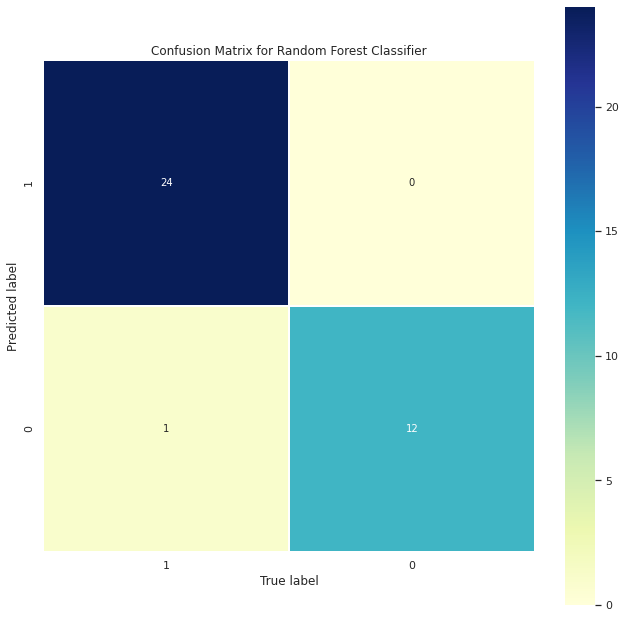

In [ ]:
mat_RFC = confusion_matrix(y_test, y_pred3)

fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for Random Forest Classifier")
sns.heatmap(mat_RFC.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=ylabels,
            yticklabels=ylabels,linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label');

cls_RFC = classification_report(y_test, y_pred3, target_names=ylabels)
print(cls_RFC)

Plotting ROC curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba3, pos_label=1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Higher values indicate higher feature importance.

By using random forest, we can conclude that the columns of zipcode, Walk score, crime rate are most important features in determining house price in San Diego. 

Hence we are taking the important features and re-calculating the accuracy.

In [ ]:
new_target_data = target_data.drop(['Walk_Score','ZIPCODE','crimerate','EstSF','hoa_and_rent'], axis=1)

In [ ]:
new_unscaled_data = new_target_data.iloc[:,:-1]
new_unscaled_data

,Sold_Price,Beds,TotB,Mortgage
1,347500,1,1,1790
3,128,3,3,5877
8,127,4,5,5820
15,305000,1,1,1639
20,795200,3,2,3471
...,...,...,...,...
603,599888,3,2,2926
605,495000,2,2,2574
606,516500,3,3,2657
644,411000,2,2,2059


Scaling the data

In [ ]:
scaler.fit(new_unscaled_data)
new_scaled_inputs = scaler.transform(new_unscaled_data)


Splitting the data into train and test sets (80% train, 20% data)

In [ ]:
from sklearn.model_selection import train_test_split
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(new_scaled_inputs, targets, train_size = 0.8, random_state = 18)
x_train_new = np.array(x_train_new)
y_train_new = np.array(y_train_new)
x_test_new = np.array(x_test_new)
y_test_new = np.array(y_test_new)

Performing Random forest on the important features

In [ ]:
# Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(x_train_new, y_train_new)
y_pred3_new = randomforest.predict(x_test_new)
y_pred_proba3_new = randomforest.predict_proba(x_test_new)[:, 1]
acc_randomforest_new = round(accuracy_score(y_pred3_new, y_test_new) * 100, 2)
print("New Random Forest Accuracy: " ,acc_randomforest_new)

New Random Forest Accuracy:  83.78


We have acheived higher accuracy now as we used the important features calculated from the random forest feature importance.

##**Applying all classifiers using Muller loop**:


*   K- Nearest Neighbors
*   Linear SVM
*   RBF SVM
*   Gaussian Process
*   Decision Tree
*   Random Forest
*   Neural Net
*   AdaBoost
*   Naive Bayes
*   QDA
*   XGBoost


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier


names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA","XGBoost"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8)
#X_train = np.array(x_train)
#y_train = np.array(y_train)
#x_test = np.array(x_test)
#y_test = np.array(y_test)

In [ ]:
ylabel = SD_data['investment_property'].unique()
ylabels = ["1" if x == 1 else "0" for x in ylabel]
ylabels

['1', '0']

In [ ]:
pip install mlxtend --user

Nearest Neighbors
Classifier = Nearest Neighbors, Score (test, accuracy) = 72.97, Training time = 0.01 seconds


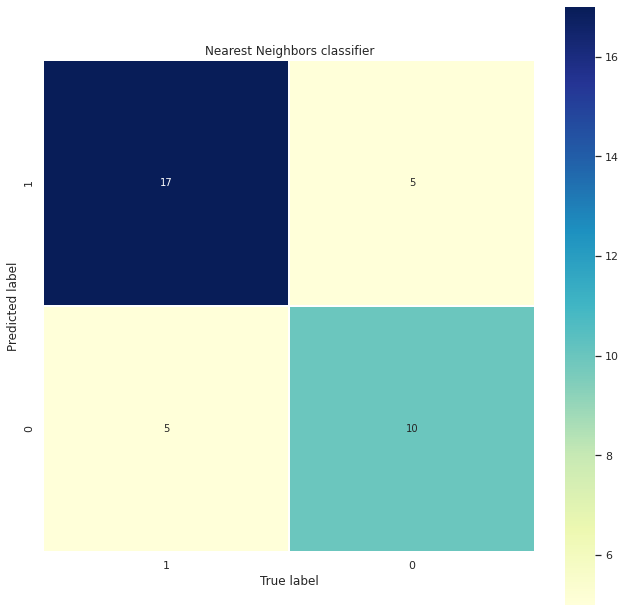

              precision    recall  f1-score   support

           1       0.77      0.77      0.77        22
           0       0.67      0.67      0.67        15

    accuracy                           0.73        37
   macro avg       0.72      0.72      0.72        37
weighted avg       0.73      0.73      0.73        37

Linear SVM
Classifier = Linear SVM, Score (test, accuracy) = 75.68, Training time = 0.00 seconds


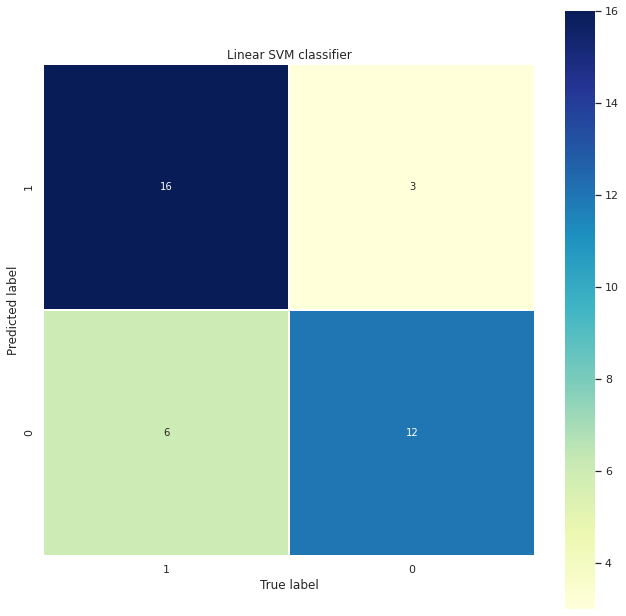

              precision    recall  f1-score   support

           1       0.84      0.73      0.78        22
           0       0.67      0.80      0.73        15

    accuracy                           0.76        37
   macro avg       0.75      0.76      0.75        37
weighted avg       0.77      0.76      0.76        37

RBF SVM
Classifier = RBF SVM, Score (test, accuracy) = 75.68, Training time = 0.00 seconds


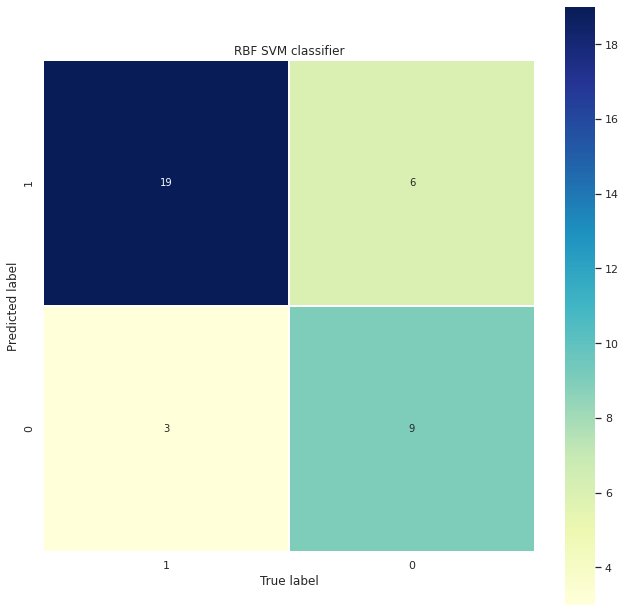

              precision    recall  f1-score   support

           1       0.76      0.86      0.81        22
           0       0.75      0.60      0.67        15

    accuracy                           0.76        37
   macro avg       0.76      0.73      0.74        37
weighted avg       0.76      0.76      0.75        37

Gaussian Process
Classifier = Gaussian Process, Score (test, accuracy) = 83.78, Training time = 0.23 seconds


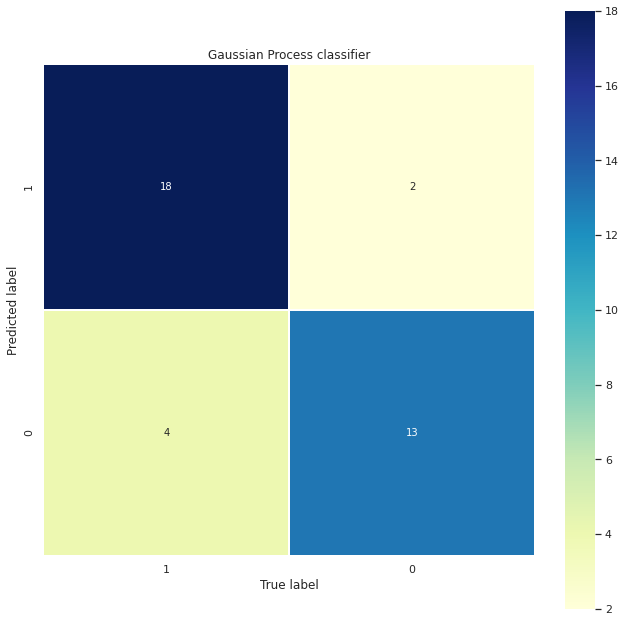

              precision    recall  f1-score   support

           1       0.90      0.82      0.86        22
           0       0.76      0.87      0.81        15

    accuracy                           0.84        37
   macro avg       0.83      0.84      0.83        37
weighted avg       0.85      0.84      0.84        37

Decision Tree
Classifier = Decision Tree, Score (test, accuracy) = 91.89, Training time = 0.00 seconds


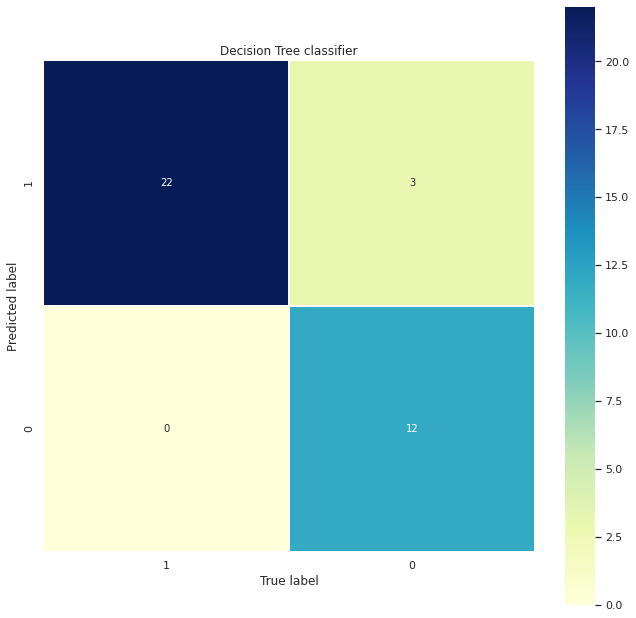

              precision    recall  f1-score   support

           1       0.88      1.00      0.94        22
           0       1.00      0.80      0.89        15

    accuracy                           0.92        37
   macro avg       0.94      0.90      0.91        37
weighted avg       0.93      0.92      0.92        37

Random Forest
Classifier = Random Forest, Score (test, accuracy) = 89.19, Training time = 0.02 seconds


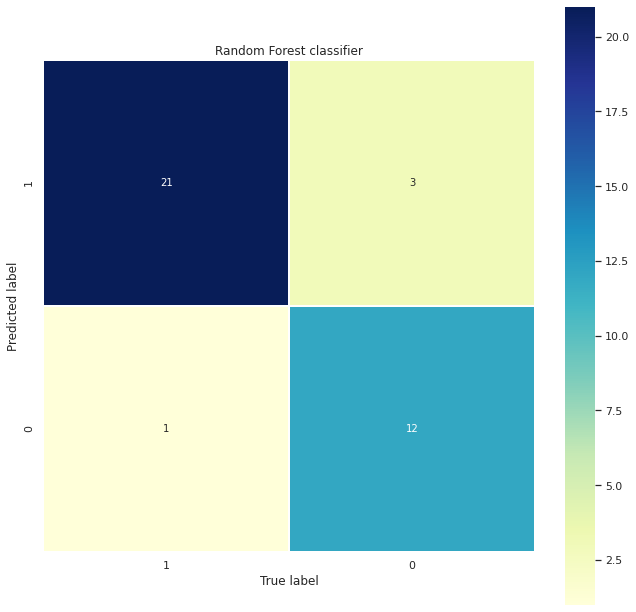

              precision    recall  f1-score   support

           1       0.88      0.95      0.91        22
           0       0.92      0.80      0.86        15

    accuracy                           0.89        37
   macro avg       0.90      0.88      0.89        37
weighted avg       0.89      0.89      0.89        37

Neural Net
Classifier = Neural Net, Score (test, accuracy) = 86.49, Training time = 0.57 seconds


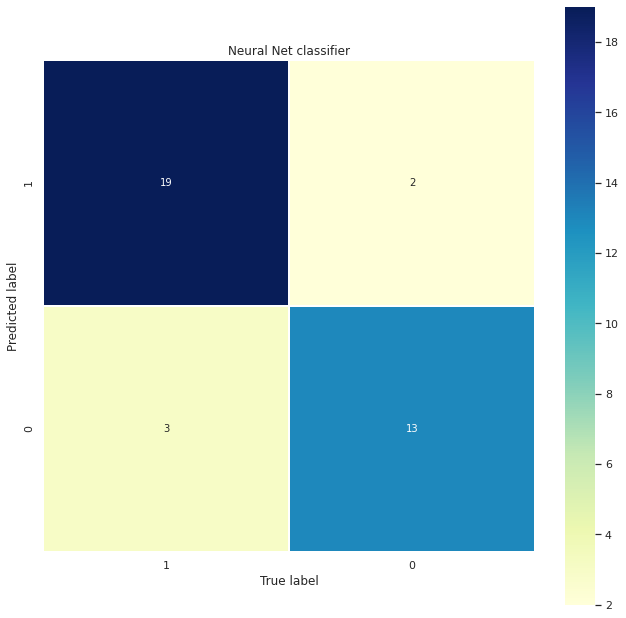

              precision    recall  f1-score   support

           1       0.90      0.86      0.88        22
           0       0.81      0.87      0.84        15

    accuracy                           0.86        37
   macro avg       0.86      0.87      0.86        37
weighted avg       0.87      0.86      0.87        37

AdaBoost
Classifier = AdaBoost, Score (test, accuracy) = 89.19, Training time = 0.09 seconds


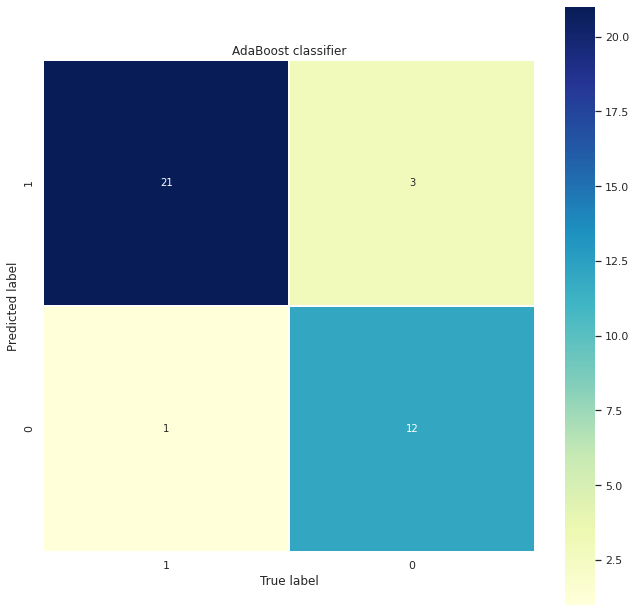

              precision    recall  f1-score   support

           1       0.88      0.95      0.91        22
           0       0.92      0.80      0.86        15

    accuracy                           0.89        37
   macro avg       0.90      0.88      0.89        37
weighted avg       0.89      0.89      0.89        37

Naive Bayes
Classifier = Naive Bayes, Score (test, accuracy) = 75.68, Training time = 0.00 seconds


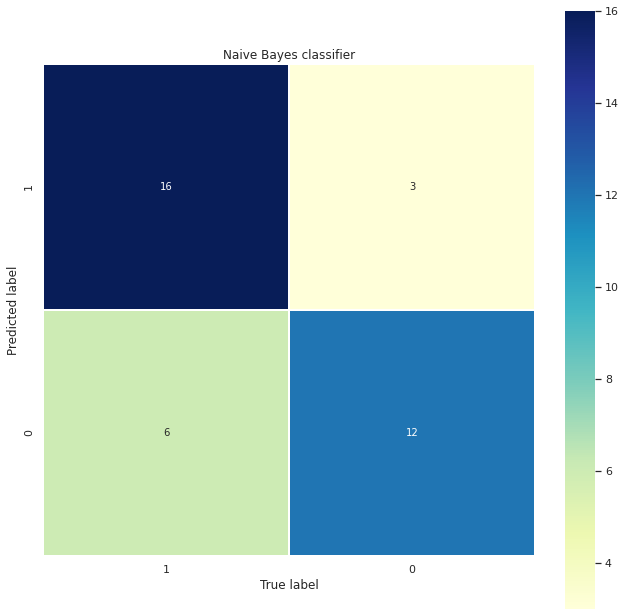

              precision    recall  f1-score   support

           1       0.84      0.73      0.78        22
           0       0.67      0.80      0.73        15

    accuracy                           0.76        37
   macro avg       0.75      0.76      0.75        37
weighted avg       0.77      0.76      0.76        37

QDA
Classifier = QDA, Score (test, accuracy) = 81.08, Training time = 0.00 seconds


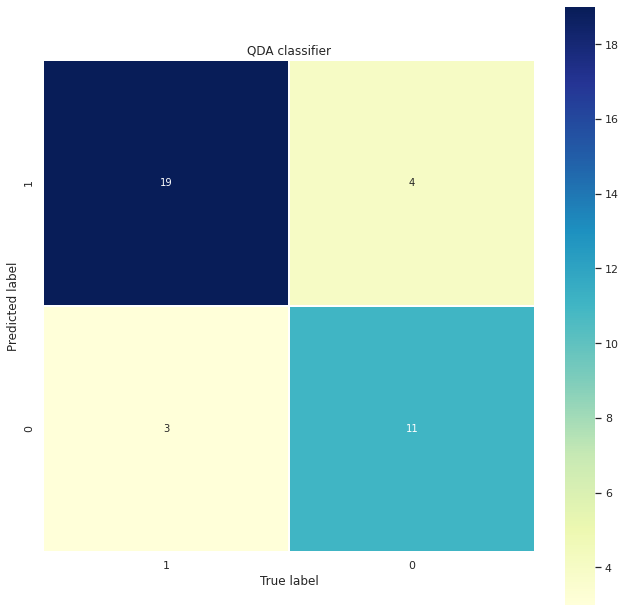

              precision    recall  f1-score   support

           1       0.83      0.86      0.84        22
           0       0.79      0.73      0.76        15

    accuracy                           0.81        37
   macro avg       0.81      0.80      0.80        37
weighted avg       0.81      0.81      0.81        37

XGBoost
Classifier = XGBoost, Score (test, accuracy) = 86.49, Training time = 0.03 seconds


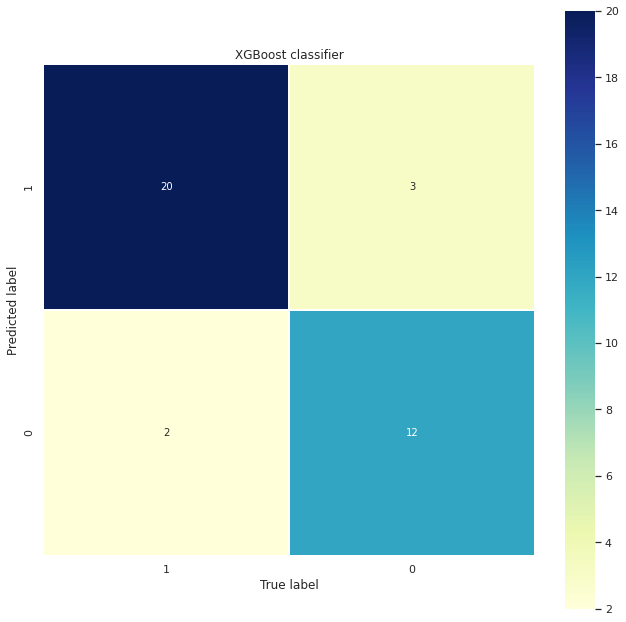

              precision    recall  f1-score   support

           1       0.87      0.91      0.89        22
           0       0.86      0.80      0.83        15

    accuracy                           0.86        37
   macro avg       0.86      0.85      0.86        37
weighted avg       0.86      0.86      0.86        37

--------------------------------------------------------------------------------
Best --> Classifier = Decision Tree, Score (test, accuracy) = 91.89


In [ ]:
import time
classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)]


log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
max_score = 0.0
max_class = ''

# a = ("John", "Charles", "Mike")
# b = ("Jenny", "Christy", "Monica")

# x = zip(a, b)

# print(classifiers)

for name, clf in zip(names, classifiers):
    print(name)
    start_time = time.time()
    #start_time = datetime.datetime.now().time()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test) 
    score = 100.0 * clf.score(x_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    mat_RFC = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(11,11))  
    ax.set_title(name + " " +"classifier")
    sns.heatmap(mat_RFC.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=ylabels,
            yticklabels=ylabels,linewidths=.5, ax=ax)
    plt.xlabel('True label')
    plt.ylabel('Predicted label');
    plt.show()

    cls_RFC = classification_report(y_test, y_pred, target_names=ylabels)
    print(cls_RFC)


    
    log_entry = pd.DataFrame([[name,score]], columns=log_cols)
    log = log.append(log_entry)

    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

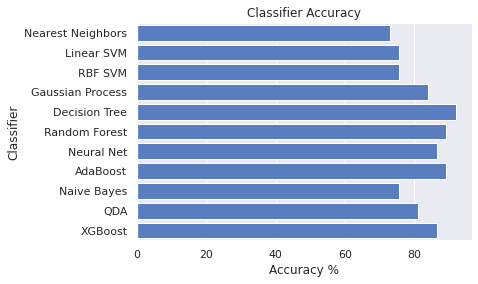

In [ ]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

XGBoost, AdaBoost, Gaussian Process and Decision Tree classifier have given highest accuracy.

##**Plotting the results of top 4 classifiers:**

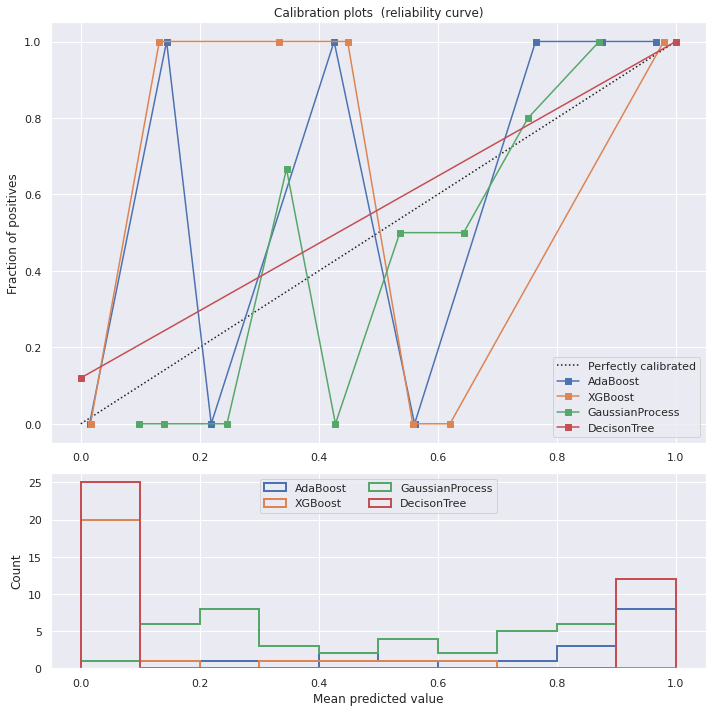

In [ ]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve


# Create classifiers
adab = AdaBoostClassifier()
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
gbc = GaussianProcessClassifier(1.0 * RBF(1.0))
dtc = DecisionTreeClassifier(max_depth=5)

# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(adab, 'AdaBoost'),
                  (xgb,'XGBoost'),
                  (gbc,'GaussianProcess'),
                  (dtc,'DecisonTree')]:
    clf.fit(x_train, y_train)
    score = 100.0 * clf.score(x_test, y_test)
    if name == 'AdaBoost':
      acc_AdaBoost  = score
    if name == 'XGBoost':
      acc_XGBoost  = score
    if name == 'GaussianProcess':
      acc_GaussianProcess  = score
    if name == 'DecisonTree':
      acc_DecisonTree  = score
    
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(x_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(x_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

models = pd.DataFrame({
    'Model': ['AdaBoost', 'XGBoost', 'GaussianProcess','DecisonTree'],
    'Score': [ acc_AdaBoost, acc_XGBoost, acc_GaussianProcess, acc_DecisonTree]})
models.sort_values(by='Score', ascending=False)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [ ]:
models

,Model,Score
0,AdaBoost,89.189189
1,XGBoost,86.486486
2,GaussianProcess,83.783784
3,DecisonTree,91.891892


##**Pickle and Load**

In [ ]:
import pickle
filename =  'final_SD_model.sav'
pickle.dump(clf_best, open(filename, 'wb'))

#load model from the disk
loaded_model = pickle.load(open(filename, 'rb'))

#Load the saved model and evaluating accuracy
result = loaded_model.score(x_test, y_test)
print(result)

0.918918918918919


##**Conclusion**

We have considered Sandiego housing dataset and amalgamated it with best cities dataset and zillow data containing hoa and rent values and walkability score.We also scrapped and amalgamted crime data and  house price data for the respective year from Washinton website to enrich the data and obtained higher accuracy scores. Thus doing this, we were able to predict house prices based on different factors like good neighborhood location, zipcodes, sqft_living  where one can invest on, such that the houses have better demand in future.

